In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
import scipy.stats as sps

sns.set()

confirmed_min = 500
dead_min = 10

In [88]:
us_state_dict = pd.read_pickle('us_state_dict.pkl')
ny = us_state_dict['New York']
ny.index = pd.DatetimeIndex(ny.index)
ny

confirmed  deceased     inc  dead_inc    factor  dead_factor  \
2020-03-14      525.0       2.0   104.0       2.0  1.247031          NaN   
2020-03-15      732.0       3.0   207.0       1.0  1.394286     1.500000   
2020-03-16      967.0      10.0   235.0       7.0  1.321038     3.333333   
2020-03-17     1706.0      13.0   739.0       3.0  1.764219     1.300000   
2020-03-18     2495.0      16.0   789.0       3.0  1.462485     1.230769   
...               ...       ...     ...       ...       ...          ...   
2020-06-04   375133.0   30174.0  1048.0     155.0  1.002802     1.005163   
2020-06-05   376208.0   30236.0  1075.0      62.0  1.002866     1.002055   
2020-06-06   377316.0   30280.0  1108.0      44.0  1.002945     1.001455   
2020-06-07   378097.0   30374.0   781.0      94.0  1.002070     1.003104   
2020-06-08   378799.0   30417.0   702.0      43.0  1.001857     1.001416   

                density    gdp  pct_dead    conf_per_M   dead_per_M  
2020-03-14  1068.424744  89076  0.380952     27.005521     0.102878  
2020-03-15  1068.424744  89076  0.409836     37.653413     0.154317  
2020-03-16  1068.424744  89076  1.034126     49.741598     0.514391  
2020-03-17  1068.424744  89076  0.762016     87.755085     0.668708  
2020-03-18  1068.424744  89076  0.641283    128.340525     0.823025  
...                 ...    ...       ...           ...          ...  
2020-06-04  1068.424744  89076  8.043547  19296.499483  1552.123048  
2020-06-05  1068.424744  89076  8.037043  19351.796502  1555.312272  
2020-06-06  1068.424744  89076  8.025104  19408.791012  1557.575591  
2020-06-07  1068.424744  89076  8.033388  19448.964940  1562.410866  
2020-06-08  1068.424744  89076  8.029852  19485.075180  1564.622746  

[87 rows x 11 columns]

In [89]:
dick = pd.read_pickle('country_data.pkl')

def strip(x):
    return x.replace('\t','')

country_populations = pd.read_csv('world_pop.csv',
                                  sep=';',header=None,index_col=0,names=['population'],
                                 thousands=',',converters={0 : strip})

dick['New York'] = ny

swe = dick['Sweden']
us = dick['US']
india = dick['India']

swe_population = country_populations.loc['Sweden','population']
swe['conf_per_M'] = swe['confirmed'] / (swe_population / 1e6)
swe['dead_per_M'] = swe['deceased'] / (swe_population / 1e6)
us['dead_per_M'] = us['deceased'] / (country_populations.loc['US','population'] / 1e6) 


no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete
no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete
no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete
no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete


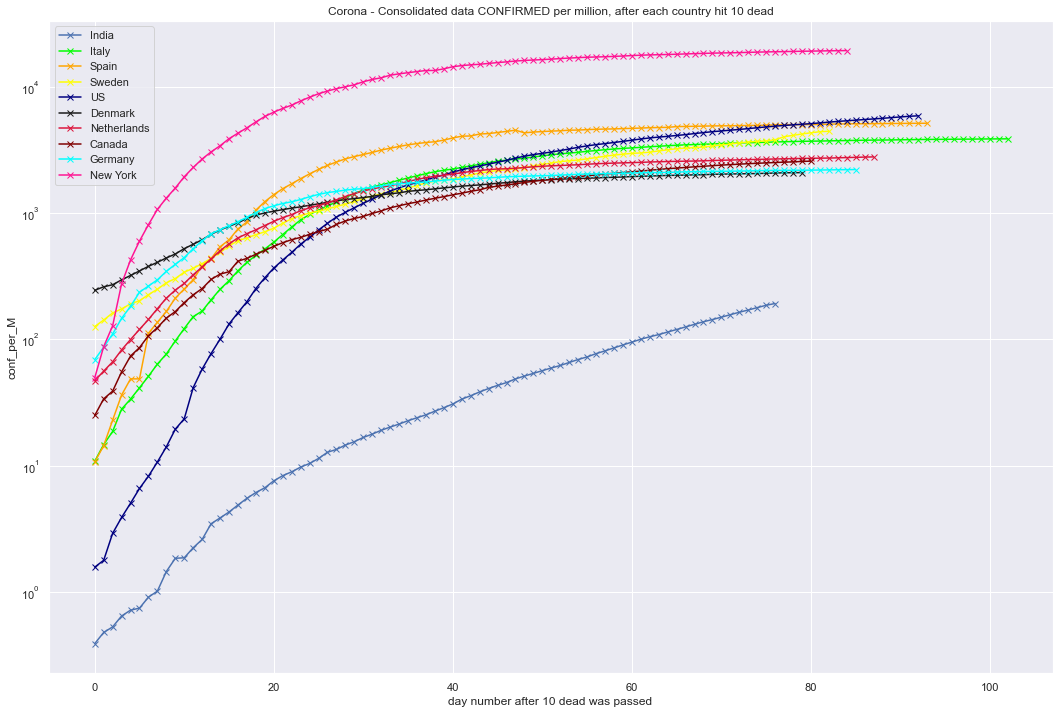

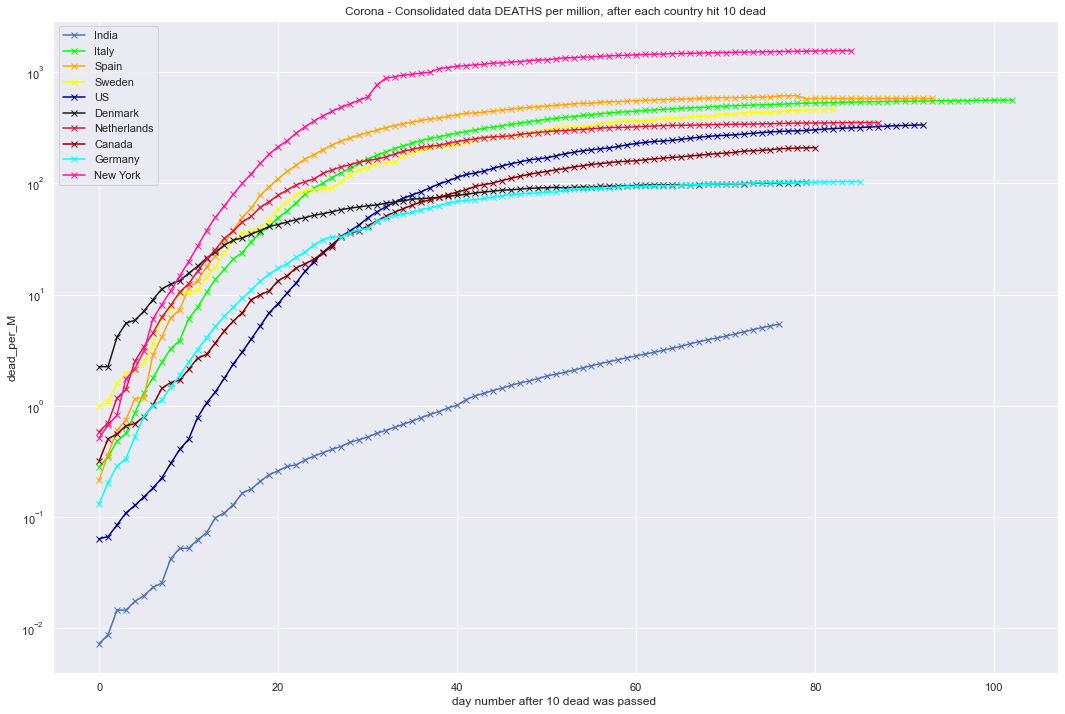

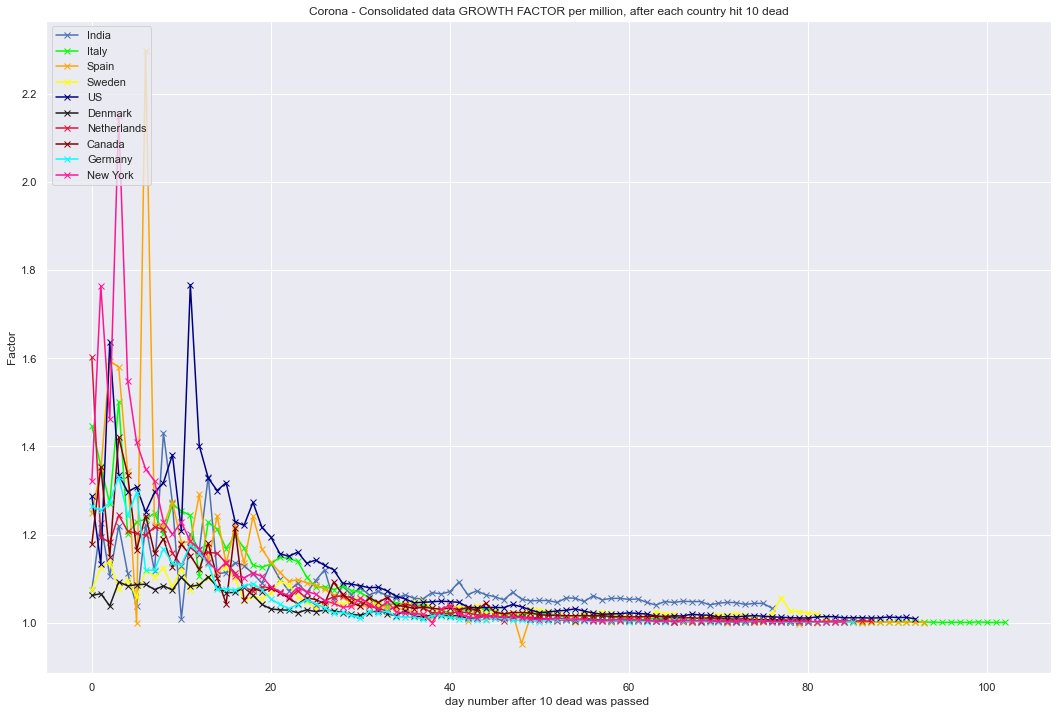

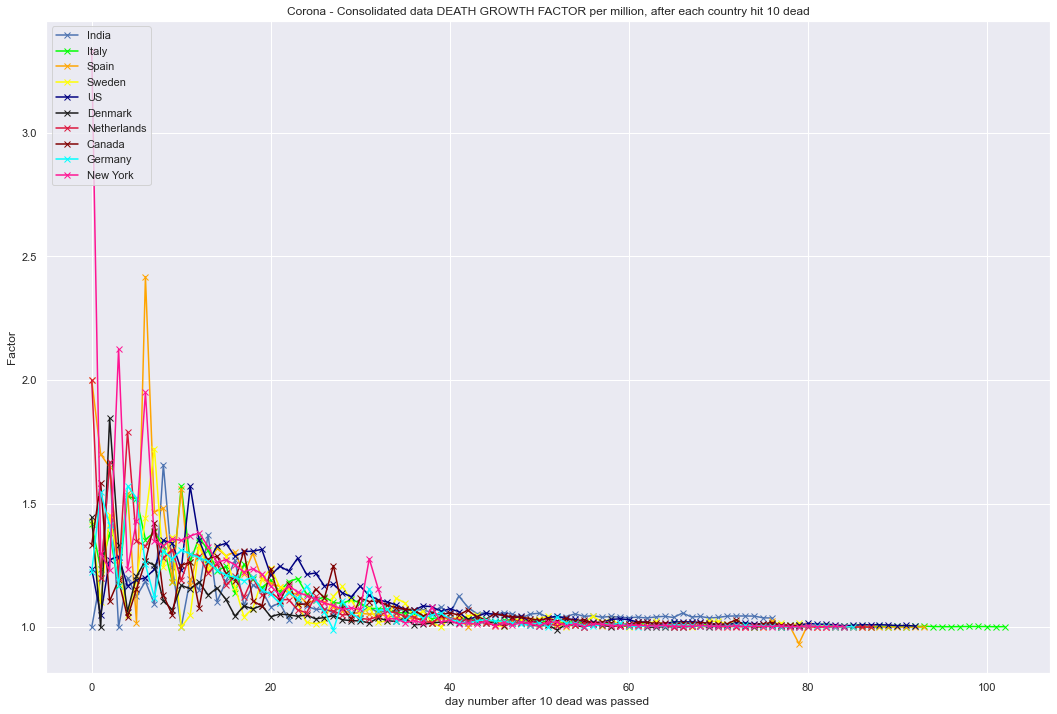

In [90]:

countries = ['India','Italy','Spain','Sweden','US',
             'Denmark','Netherlands','Canada','Germany','New York']

#countries = ['United Kingdom','Finland','Norway','Denmark','Sweden','Iceland']
#countries = ['Sweden']

colors = ['b','lime','orange','yellow','navy','k','crimson','maroon','cyan','deeppink']


plt.figure(figsize=(18,12))
plt.title('Corona - Consolidated data CONFIRMED per million, after each country hit {} dead'.format(dead_min))
plt.yscale('log')

#longest history
max_x = len(dick['Italy'])

def process_country(country,param,color_idx):
    df = dick[country]
    
    try:
        df = df.drop(['dead_conf_ratio','conf_over_dead'],axis=1)
    except:
        print ('no cols dead_conf_ratio,conf_over_dead  for {} - skipping delete'.format(country))
   
    population = country_populations.loc[country,'population']
    df['conf_per_M'] = df['confirmed'] / (population / 1e6)
    df['dead_per_M'] = df['deceased'] / (population / 1e6)
    df['factor_per_M'] = df['conf_per_M'] / df['conf_per_M'].shift()
    df['factor_dead_per_M'] = df['dead_per_M'] / df['dead_per_M'].shift()
    
    mask = ( ( df['confirmed'] >= confirmed_min ) & ( df['deceased'] >= dead_min))
    df = df[mask]
    df.reset_index(inplace=True)
    
    #slope,intercept,_,_,_ = sps.linregress(df.index,df[param])
    #slope = np.log10(slope)
    #intercept = np.log10(intercept)
    
    #X = np.linspace(min(df.index) ,max(df.index),40)
    
    #plt.plot([X[i] * slope + intercept for i in range(len(X))],'--',color=colors[color_idx],
             #label=country +'_regression, slope:{:.2f} intercept:{:.2f}'.format(slope,intercept))
    
    plt.plot(df[param],'x-',label=country,color=colors[color_idx])
    
    plt.legend(loc='upper left')  
    
    if 'factor' in param:
        plt.ylabel('Factor')
    else:
        plt.ylabel('{}'.format(param))
        
    plt.xlabel('day number after {} dead was passed '.format(dead_min))
    plt.yscale('log')
    
    ### CHANGE LIMIT WHEN NEEDED ###
    #plt.xlim([0,max_x])
    
    
    
param = 'conf_per_M'

for i,c in enumerate(countries):
    process_country(c,param,i)

plt.savefig('Corona_consolidated_min_confirmed.jpg',format='jpg')

plt.figure(figsize=(18,12))
plt.title('Corona - Consolidated data DEATHS per million, after each country hit {} dead'.format(dead_min))

param = 'dead_per_M'

for i,c in enumerate(countries):
    process_country(c,param,i)
  
plt.savefig('Corona_consolidated_min_dead.jpg',format='jpg')

plt.figure(figsize=(18,12))
plt.title('Corona - Consolidated data GROWTH FACTOR per million, after each country hit {} dead'.format(dead_min))

param = 'factor_per_M'

for i,c in enumerate(countries):
    process_country(c,param,i)
    plt.yscale('linear')
    
plt.savefig('Corona_consolidated_min_factor.jpg',format='jpg')

plt.figure(figsize=(18,12))
plt.title('Corona - Consolidated data DEATH GROWTH FACTOR per million, after each country hit {} dead'.format(dead_min))

param = 'factor_dead_per_M'

for i,c in enumerate(countries):
    process_country(c,param,i)
    plt.yscale('linear')
    
    
plt.savefig('Corona_consolidated_dead_min_factor.jpg',format='jpg')


In [91]:
def smooth(x,window_len=10,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string   
    """
    
    '''
    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"

    '''
    x = np.array(x,dtype=float) #conv from dataframe col to array
    s=np.r_[2*x[0]-x[window_len:1:-1],x,2*x[-1]-x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='same')
    return y[window_len-1:-window_len+1]


India
            confirmed    factor      inc  deceased  dead_factor  dead_inc  \
2020-06-04     226713  1.045608   9889.0      6363     1.045171     275.0   
2020-06-05     236184  1.041775   9471.0      6649     1.044947     286.0   
2020-06-06     246622  1.044194  10438.0      6946     1.044668     297.0   
2020-06-07     257486  1.044051  10864.0      7207     1.037576     261.0   
2020-06-08     265928  1.032786   8442.0      7473     1.036909     266.0   

            pct_dead  conf_over_dead  dead_conf_ratio  
2020-06-04  2.806632       35.629892         0.999581  
2020-06-05  2.815178       35.521733         1.003045  
2020-06-06  2.816456       35.505615         1.000454  
2020-06-07  2.798987       35.727210         0.993798  
2020-06-08  2.810159       35.585173         1.003991  
Italy
            confirmed    factor    inc  deceased  dead_factor  dead_inc  \
2020-06-04     234013  1.000757  177.0     33689     1.002619      88.0   
2020-06-05     234531  1.002214  518.0 

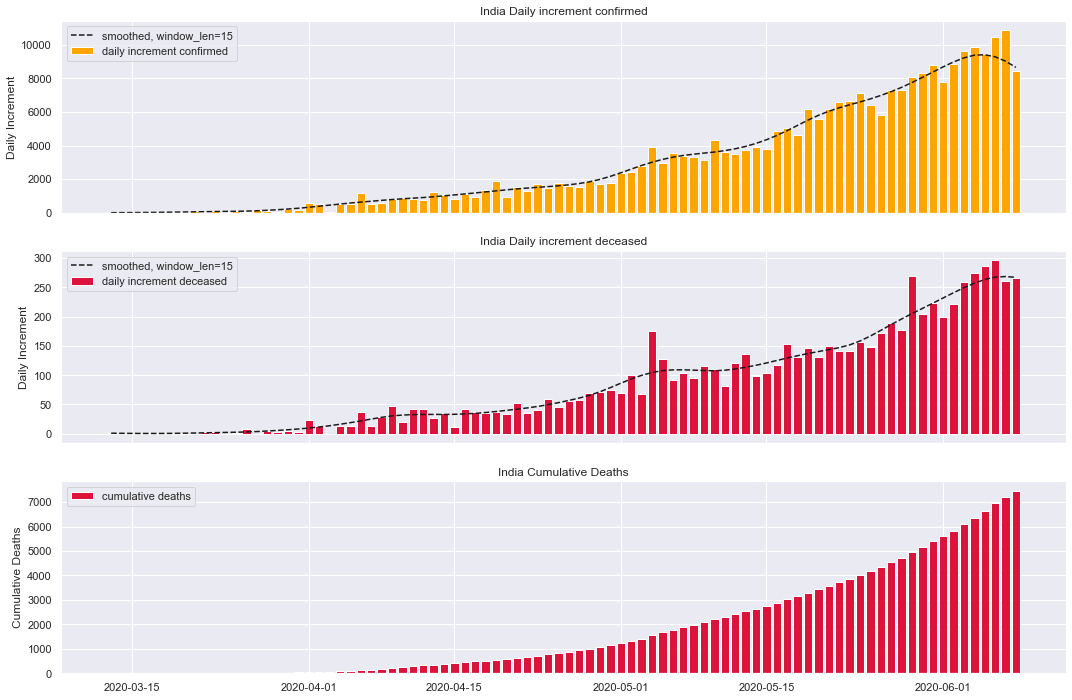

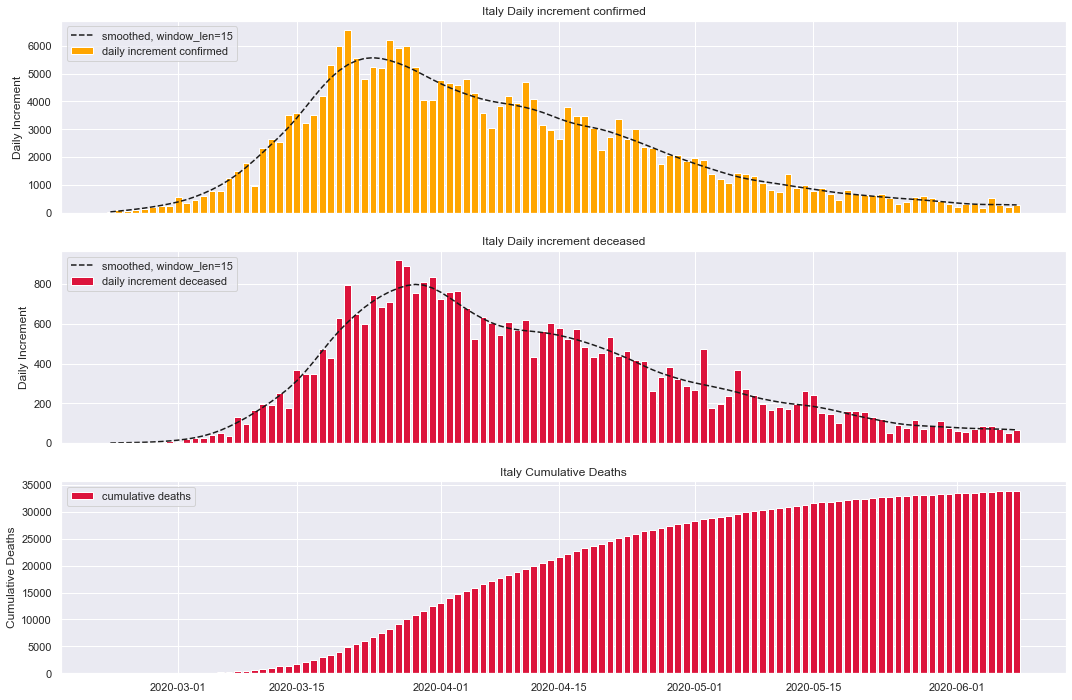

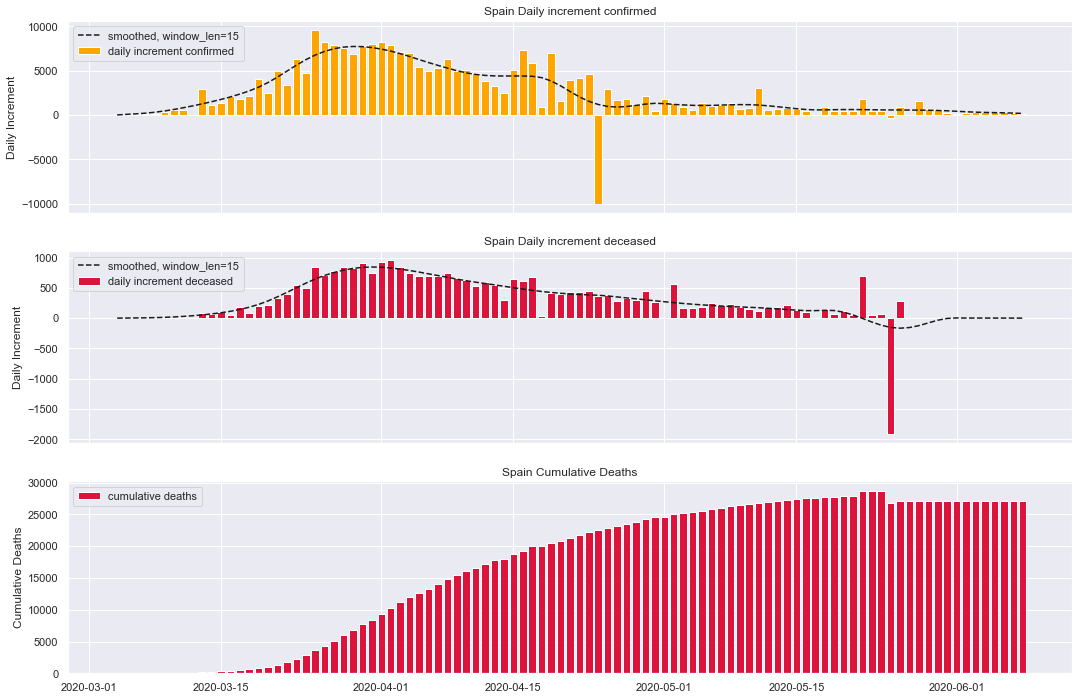

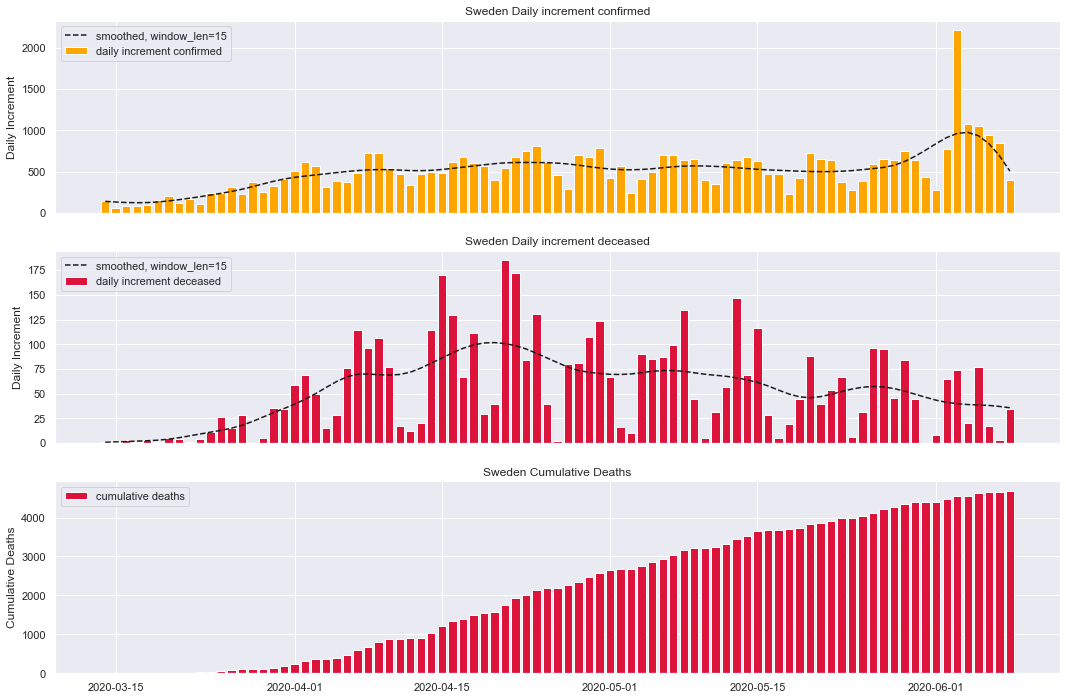

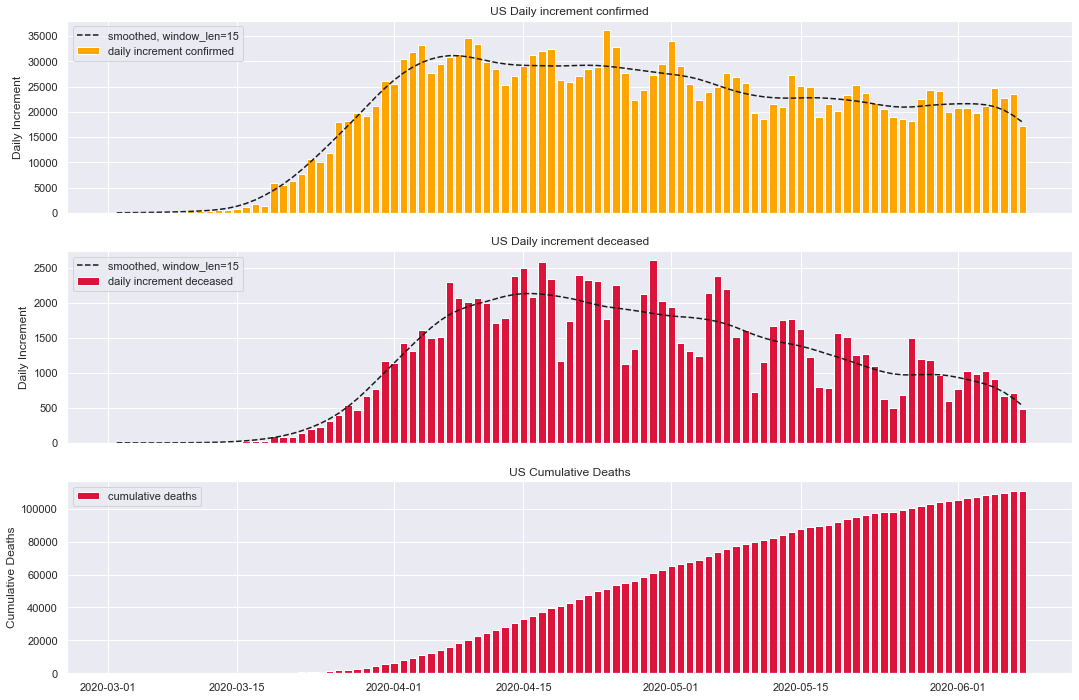

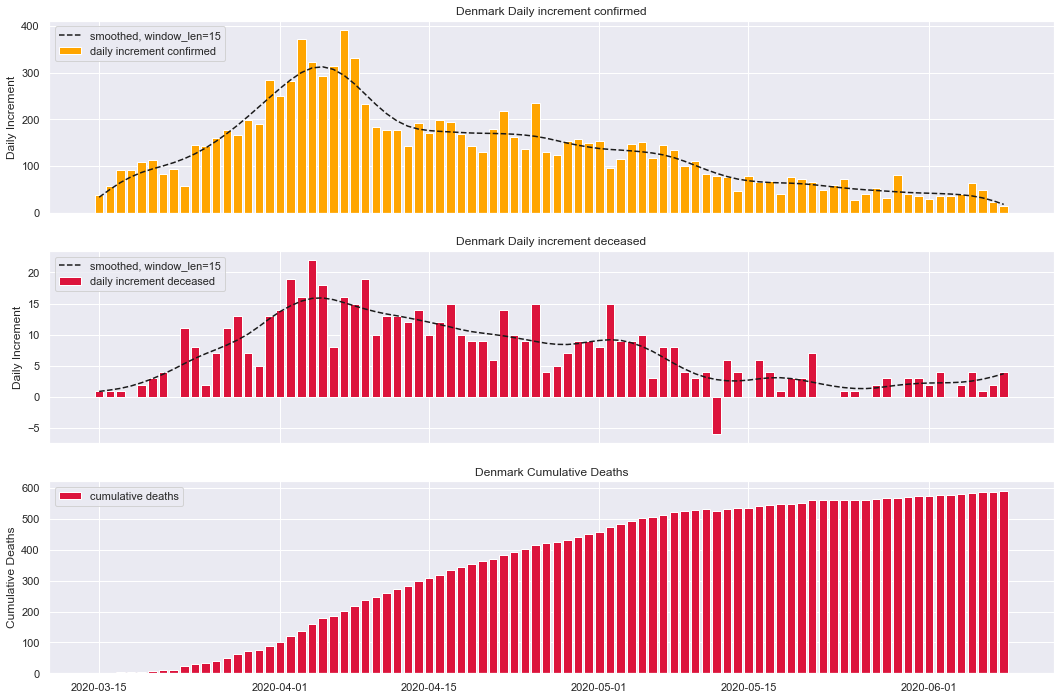

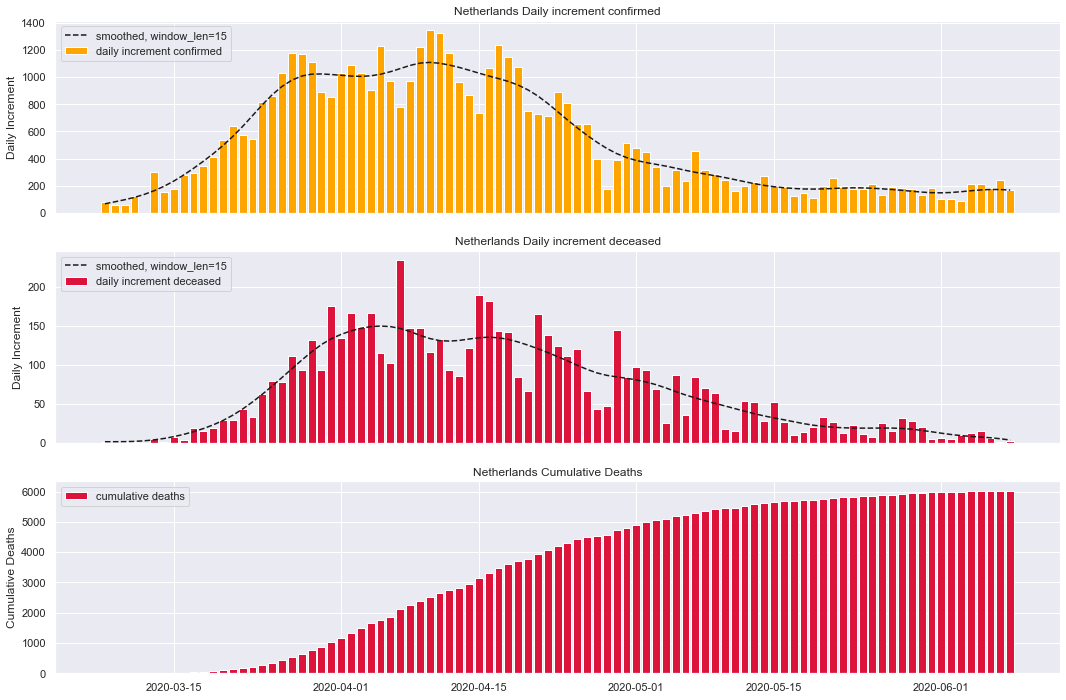

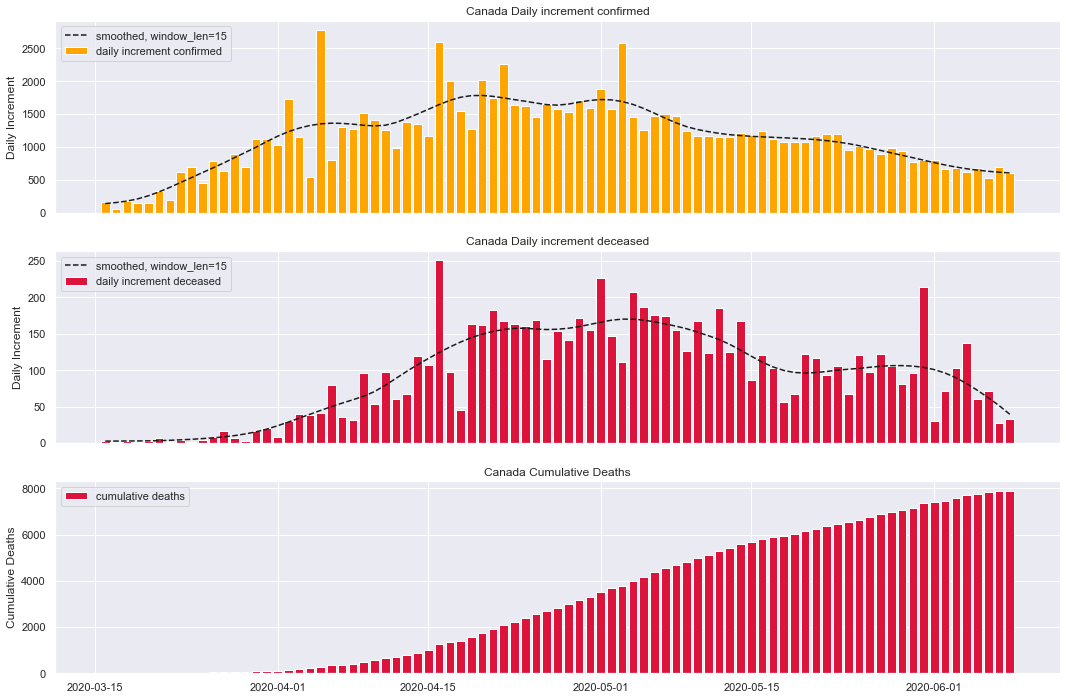

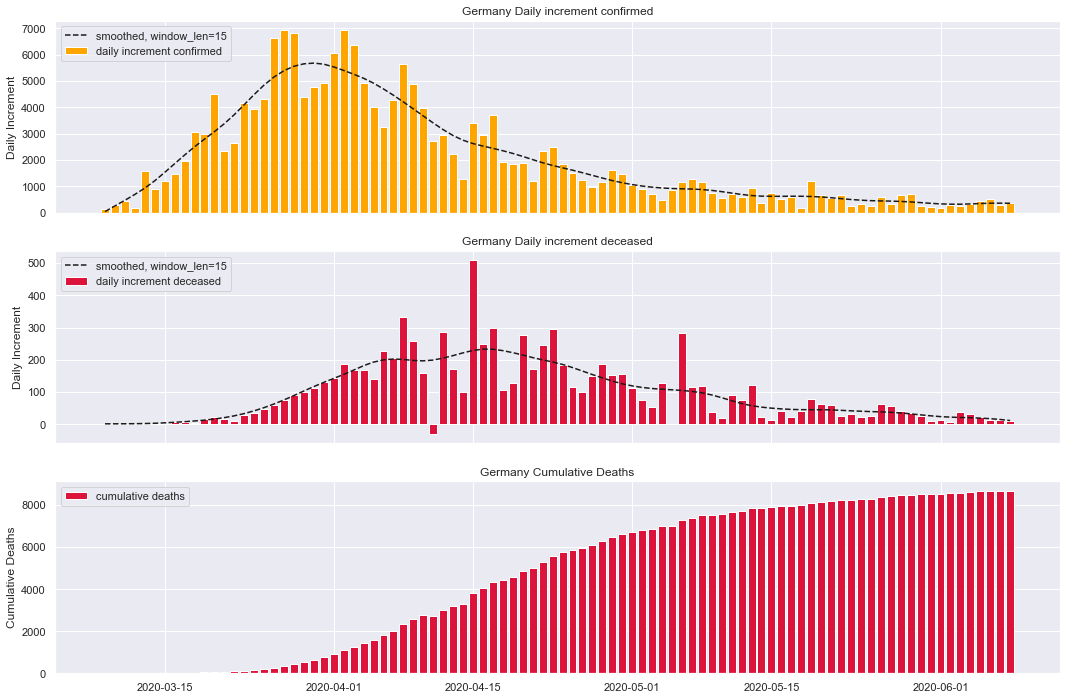

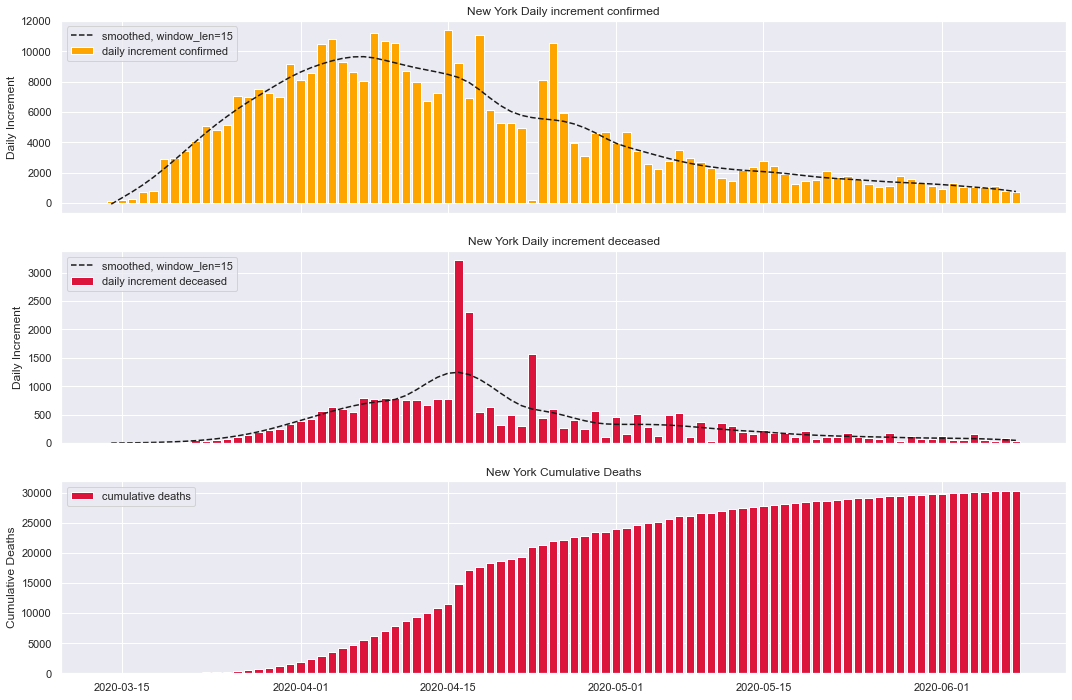

In [92]:


# countries = ['United Kingdom','Australia','Russia','Brazil']

for c in countries:
    print (c)
    window_len = 15
    fig,axes = plt.subplots(3,1,sharex=True,figsize=(18,12))
    df = dick[c]
    df = df[df['deceased'] > 1]
    df.index = df.index.date
    print (df.tail())
    axes[0].set_title('{} Daily increment confirmed'.format(c))
    axes[1].set_title('{} Daily increment deceased'.format(c))
    axes[0].plot(df.index,smooth(df['inc'],window_len=window_len),
                 color='k',ls='dashed',label='smoothed, window_len={}'.format(window_len))
    axes[1].plot(df.index,smooth(df['dead_inc'],window_len=window_len),color='k',
                 ls='dashed',label='smoothed, window_len={}'.format(window_len))
    axes[0].bar(df.index,df['inc'],color='orange',label='daily increment confirmed')
    axes[1].bar(df.index,df['dead_inc'],color='crimson',label='daily increment deceased')
    axes[0].legend(loc='upper left')
    axes[1].legend(loc='upper left')
    axes[0].set_ylabel('Daily Increment')
    axes[1].set_ylabel('Daily Increment')
    
    axes[2].set_title('{} Cumulative Deaths'.format(c))
    axes[2].bar(df.index,df['dead_inc'].cumsum(),color='crimson',label='cumulative deaths')
    axes[2].set_ylabel('Cumulative Deaths')
    axes[2].legend(loc='upper left')
    
    plt.savefig('daily_incs_{}.jpg'.format(c))

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  after removing the cwd from sys.path.


++++++++++++++++ India
                inc  dead_inc
2020-03-16     63.0       2.0
2020-03-23    380.0       8.0
2020-03-30    752.0      22.0
2020-04-06   3527.0     104.0
2020-04-13   5675.0     222.0
2020-04-20   8086.0     234.0
2020-04-27  10912.0     347.0
2020-05-04  16986.0     627.0
2020-05-11  24331.0     728.0
2020-05-18  29560.0     862.0
2020-05-25  44622.0    1016.0
2020-06-01  53420.0    1436.0
2020-06-08  67558.0    1865.0
++++++++++++++++ Italy
                inc  dead_inc
2020-02-24    226.0       7.0
2020-03-02   1807.0      45.0
2020-03-09   7136.0     411.0
2020-03-16  18808.0    1695.0
2020-03-23  35947.0    3919.0
2020-03-30  37812.0    5514.0
2020-04-06  30808.0    4932.0
2020-04-13  26969.0    3942.0
2020-04-20  21712.0    3649.0
2020-04-27  18186.0    2863.0
2020-05-04  12524.0    2102.0
2020-05-11   7876.0    1660.0
2020-05-18   6072.0    1268.0
2020-05-25   4272.0     870.0
2020-06-01   3039.0     598.0
2020-06-08   2081.0     489.0
++++++++++++++++ Spain
 

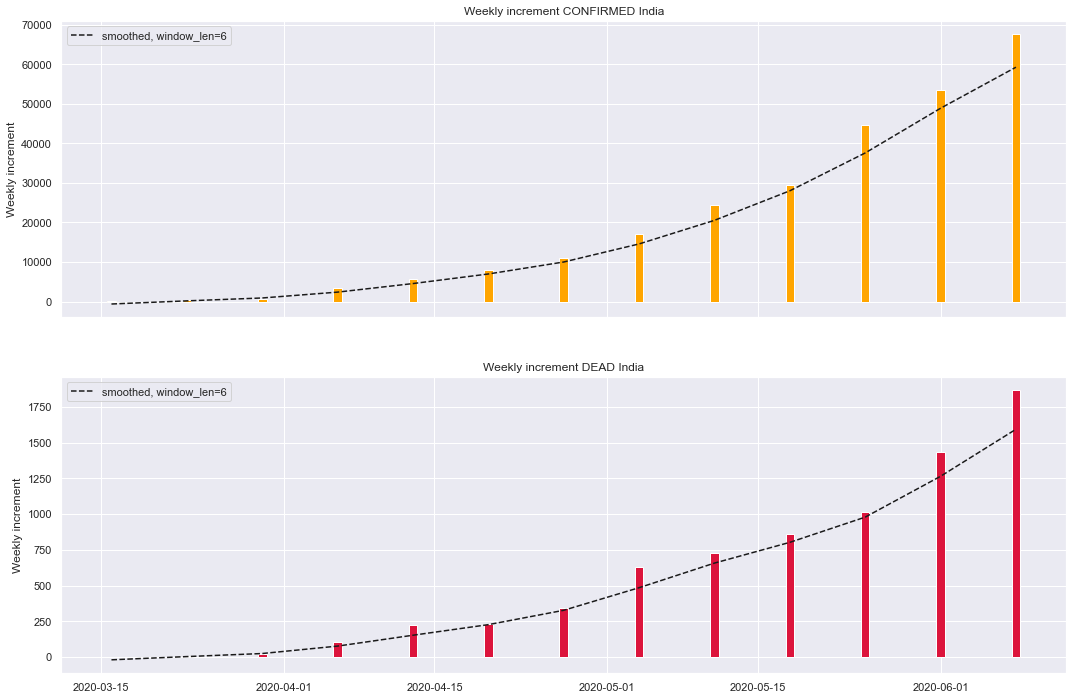

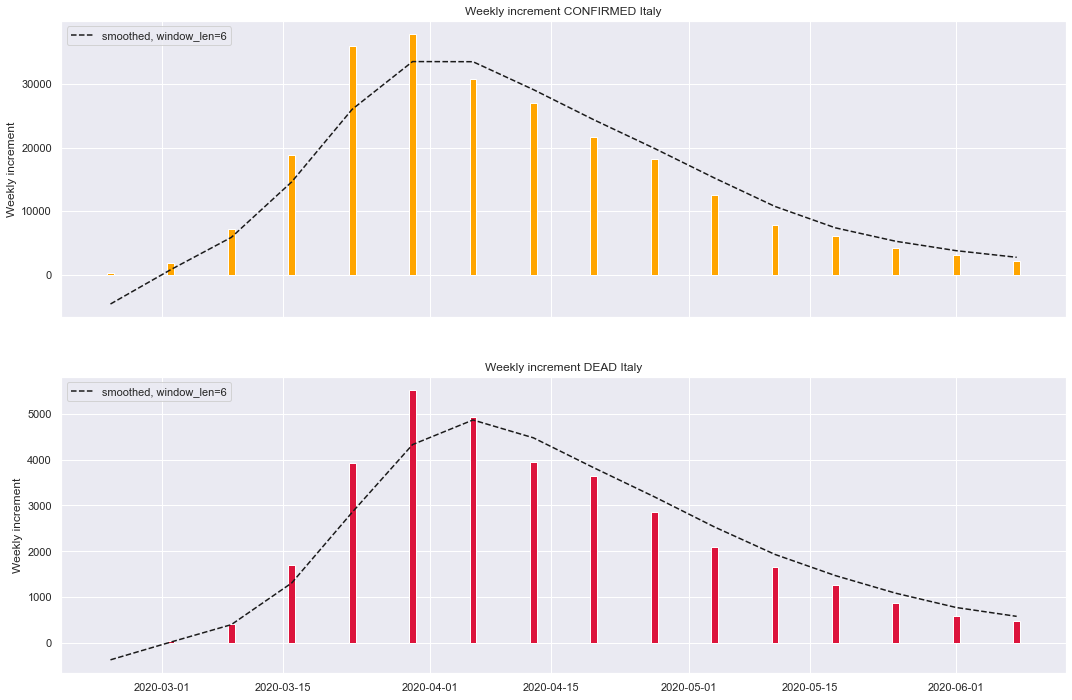

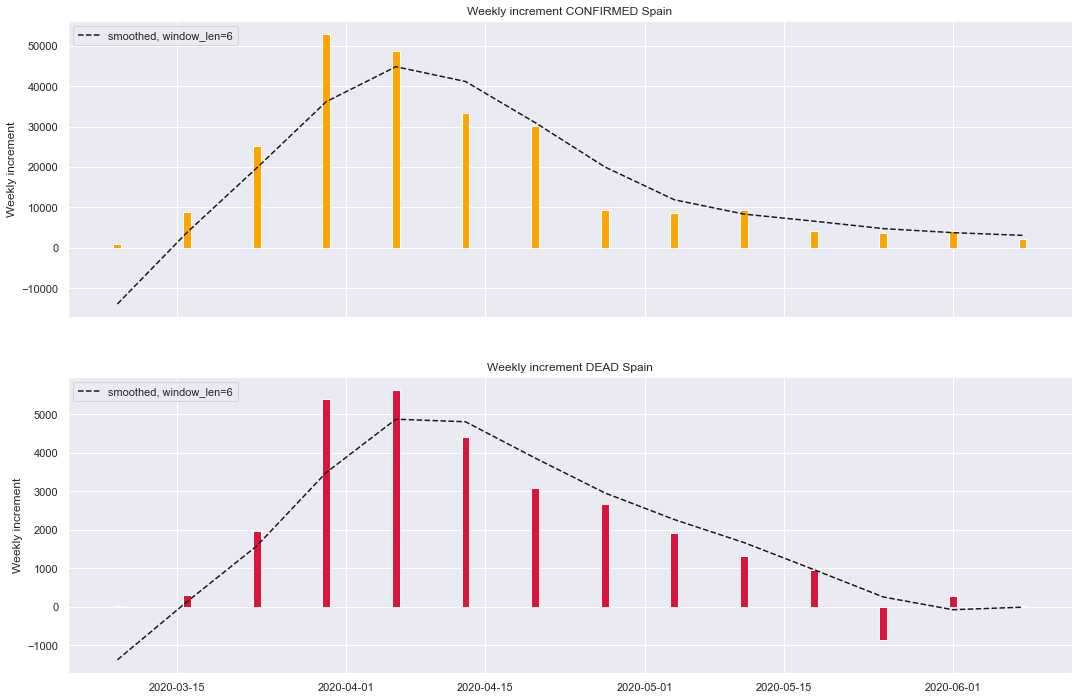

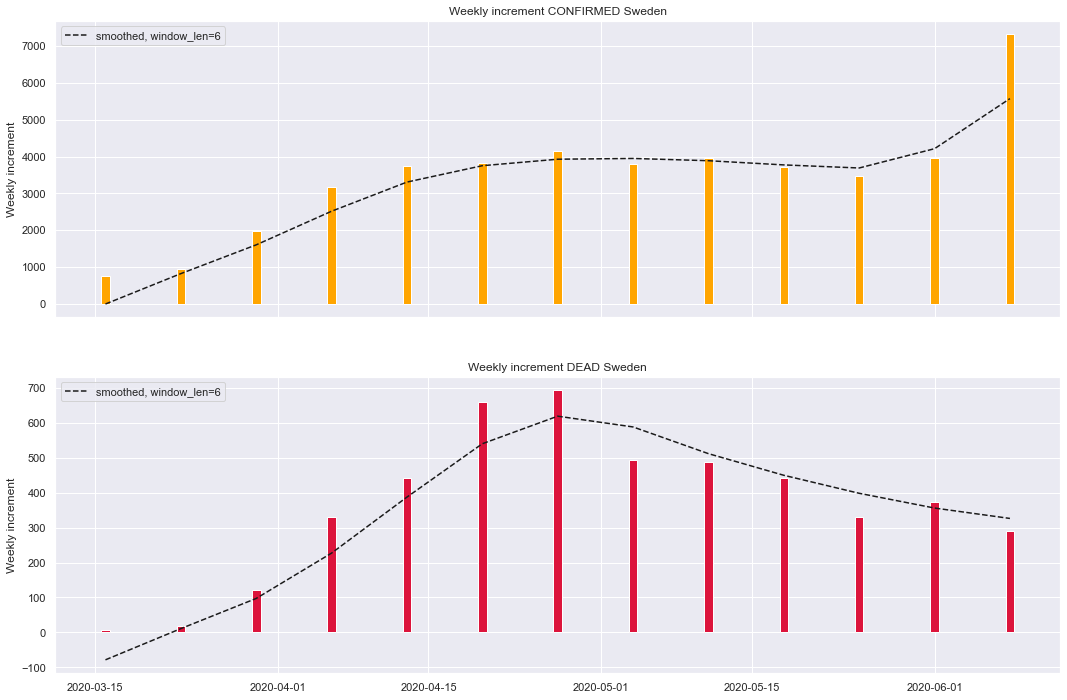

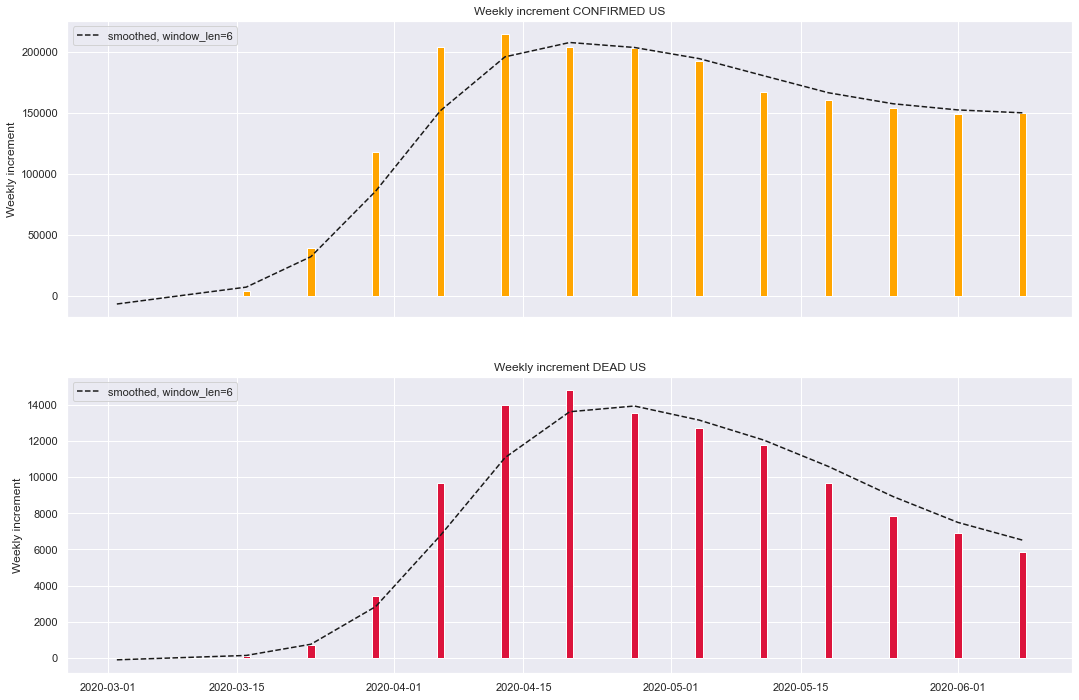

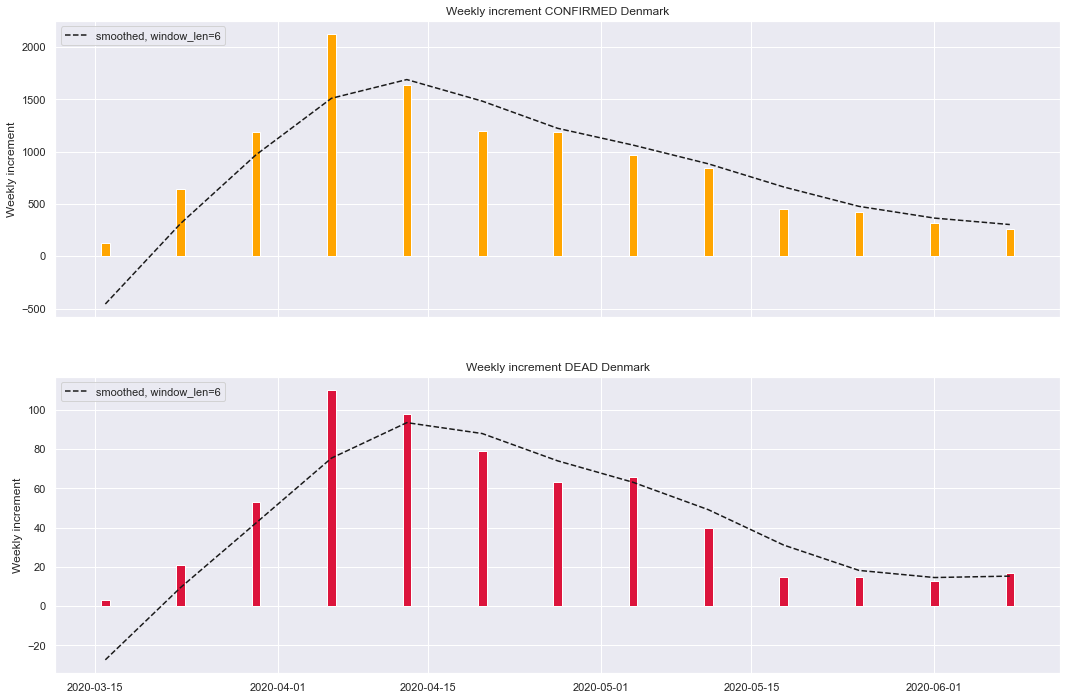

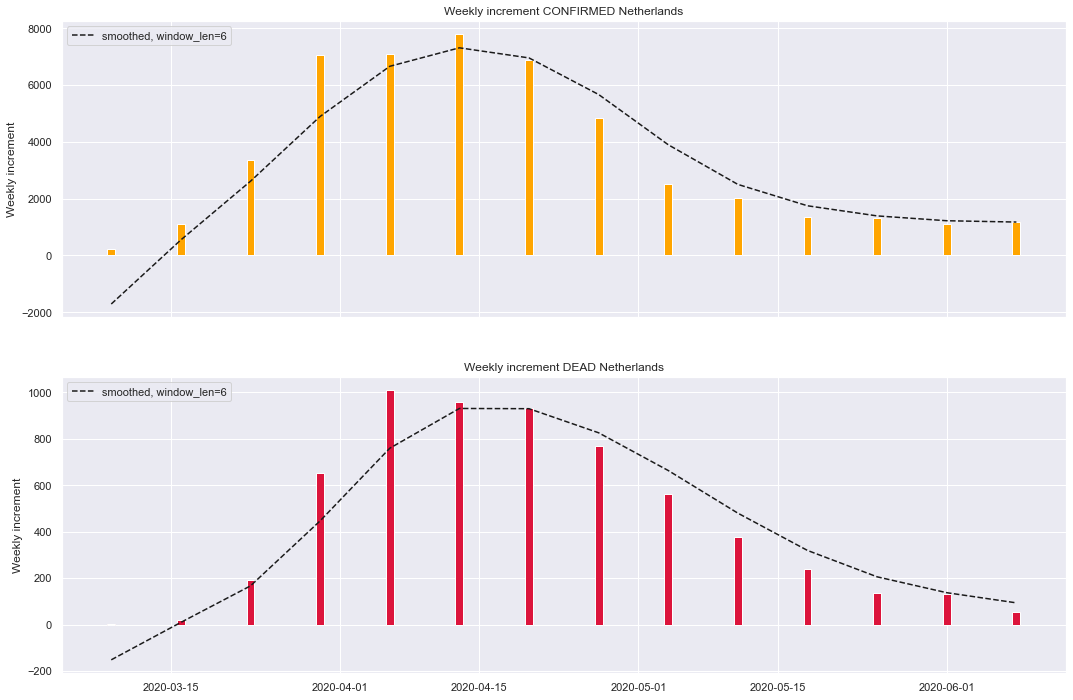

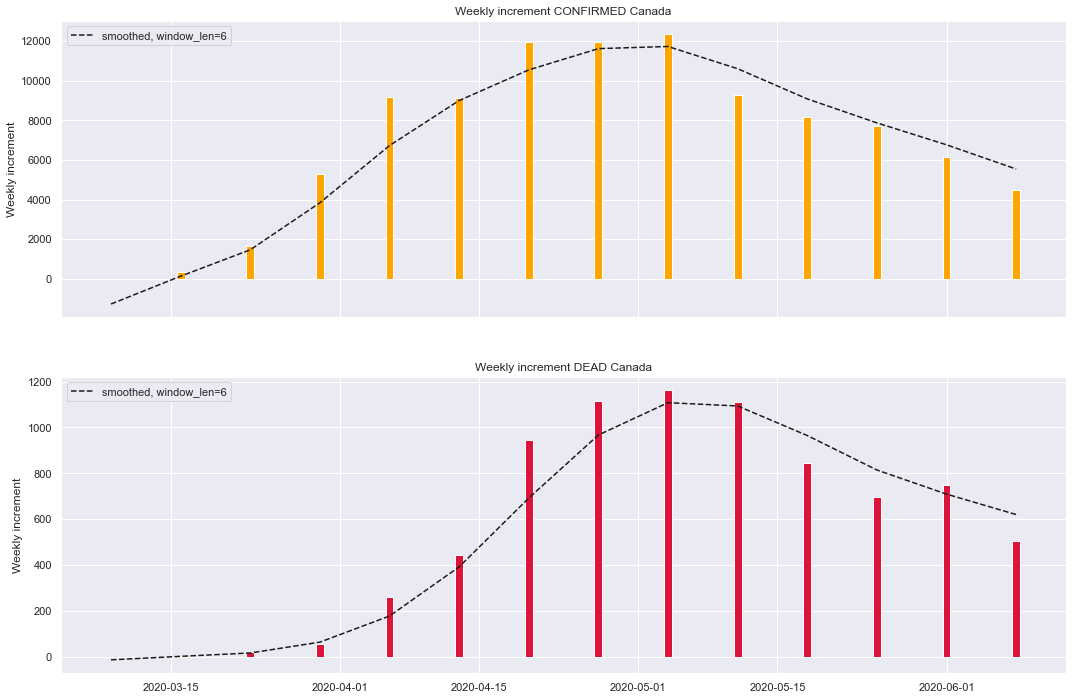

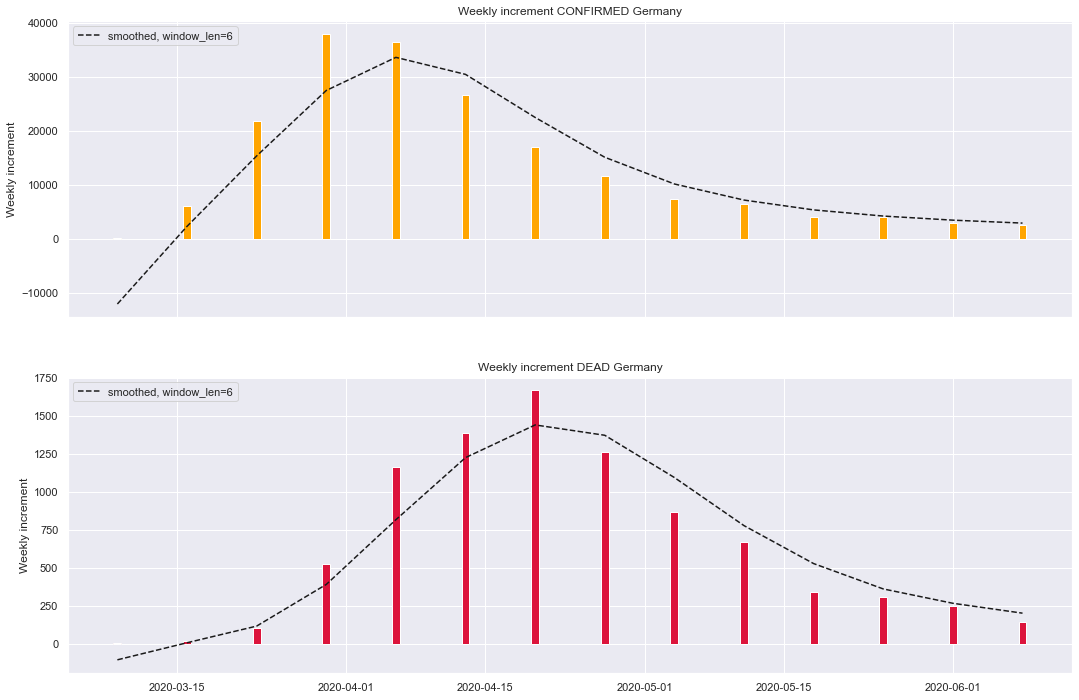

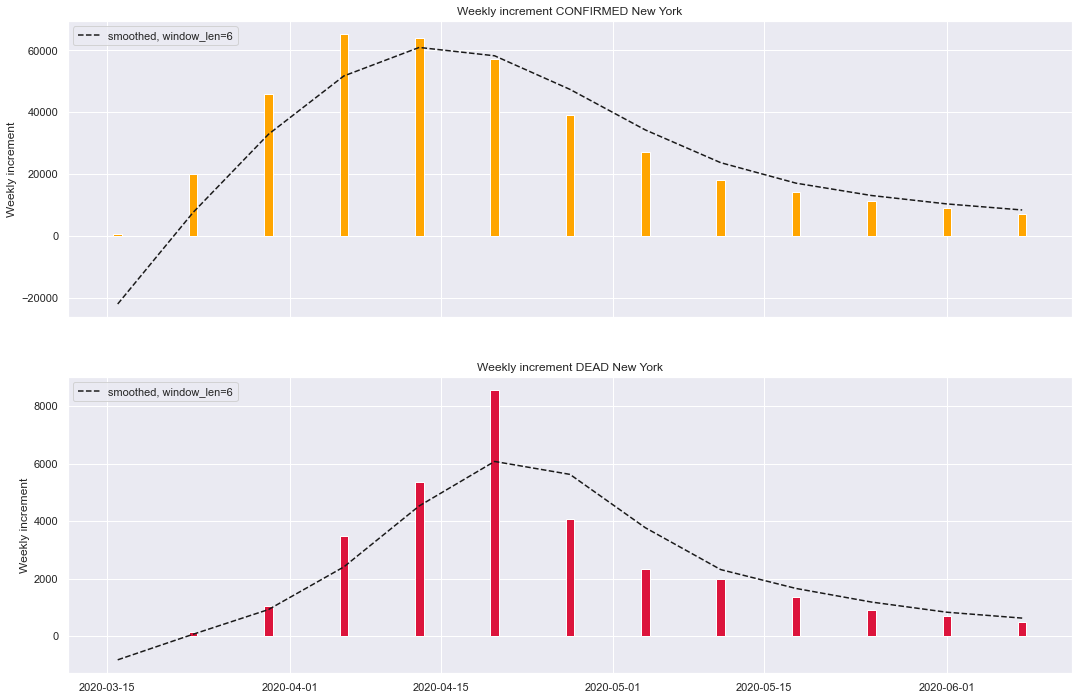

In [93]:


resample_period = ['W-MON','W-TUE','W-WED','W-THU','W-FRI','W-SAT','W-SUN']
today = pd.datetime.today().weekday()

yesterday = lambda i : resample_period[i % 7 -1] if i != 0 else resample_period[6]

window_len = 6

for c in countries:
    fig,axes=plt.subplots(2,1,figsize=(18,12),sharex=True)
    
    df = dick[c]
    df = df[df['deceased'] > 0]
    df_weekly = df.resample(yesterday(today)).agg({'inc' : np.sum,'dead_inc':np.sum})

    print ('++++++++++++++++ {}'.format(c))
    print (df_weekly)
    axes[0].set_title('Weekly increment CONFIRMED {}'.format(c))
    axes[1].set_title('Weekly increment DEAD {}'.format(c))
    axes[0].set_ylabel('Weekly increment')
    axes[1].set_ylabel('Weekly increment')
    axes[0].bar(df_weekly.index,df_weekly['inc'],color='orange')
    axes[1].bar(df_weekly.index,df_weekly['dead_inc'],color='crimson')
    
    axes[0].plot(df_weekly.index,smooth(df_weekly['inc'],window_len=window_len),
                 color='k',ls='dashed',label='smoothed, window_len={}'.format(window_len))
    
    axes[1].plot(df_weekly.index,smooth(df_weekly['dead_inc'],window_len=window_len),
                 color='k',ls='dashed',label='smoothed, window_len={}'.format(window_len))

    axes[0].legend(loc='upper left')
    axes[1].legend(loc='upper left')
    
    plt.savefig('weekly_increments_{}.jpg'.format(c))

    

cant find population for Bahamas, skippin..
cant find population for Congo (Brazzaville), skippin..
cant find population for Congo (Kinshasa), skippin..
cant find population for Cote d'Ivoire, skippin..
cant find population for Diamond Princess, skippin..
cant find population for Saint Vincent and the Grenadines, skippin..
cant find population for West Bank and Gaza, skippin..
cant find population for Saint Kitts and Nevis, skippin..
cant find population for Kosovo, skippin..
cant find population for Burma, skippin..
cant find population for MS Zaandam, skippin..
cant find population for Sao Tome and Principe, skippin..


Text(450.6285714285715, 0.5, 'dead_M')

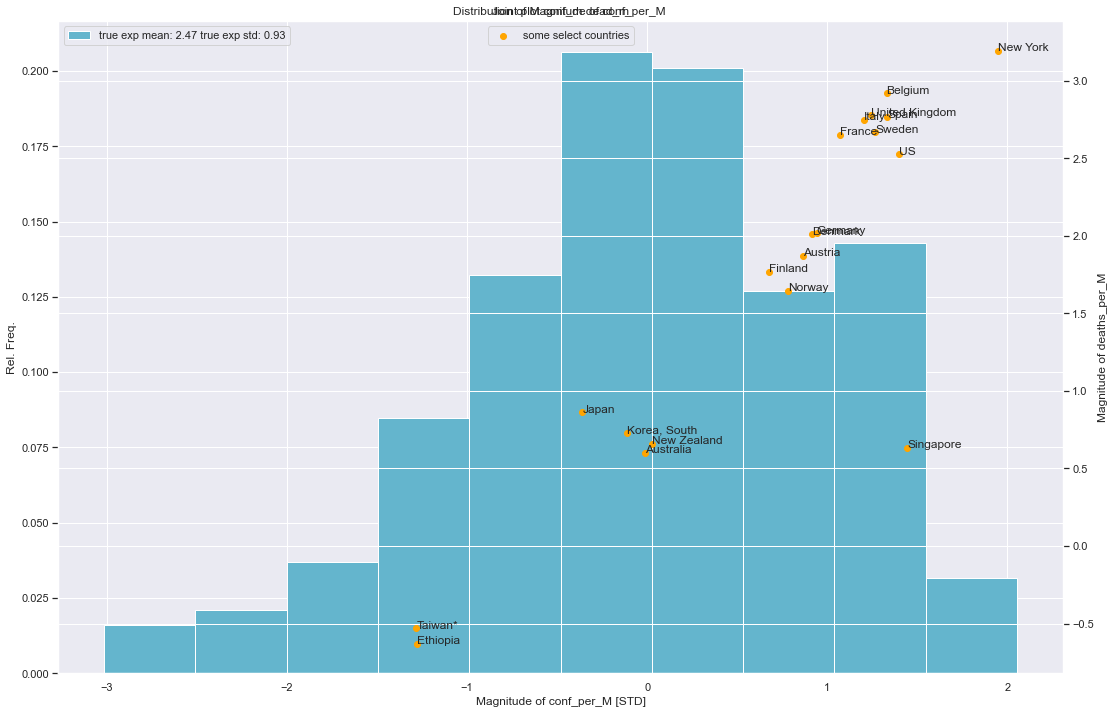

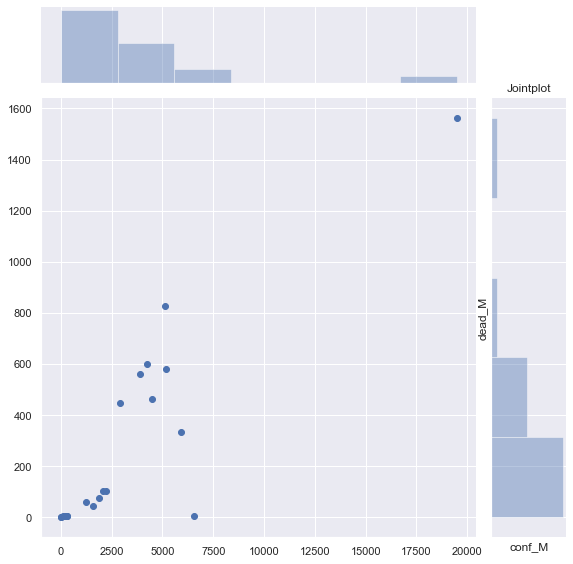

In [94]:
stats_df = pd.DataFrame()

param = 'conf_per_M'

for country,data in dick.items():
    try:
        population = country_populations.loc[country,'population']
    except:
        print ('cant find population for {}, skippin..'.format(country))
    data['conf_per_M'] = data['confirmed'] / (population / 1e6)
    data['dead_per_M'] = data['deceased'] / (population / 1e6)
    data['factor_per_M'] = data['conf_per_M'] / data['conf_per_M'].shift()
    data['factor_dead_per_M'] = data['dead_per_M'] / data['dead_per_M'].shift()
    data = pd.DataFrame(data[param])
    data = data.iloc[-1]
    
    stats_df = pd.concat([stats_df,data])


magnitude = np.log10(stats_df[0])

def std(x,mean,std):
    return (x -  mean) / std

magnitude_std = std(magnitude,magnitude.mean(),magnitude.std())

plt.figure(figsize=(18,12))

ax = plt.gca()
ax2 = plt.twinx()

ax.set_title('Distribution of Magnitude of {} '.format(param))
ax.set_ylabel('Rel. Freq.')
ax.set_xlabel('Magnitude of ' + param + ' [STD]')
ax.hist(magnitude_std,weights= np.ones_like(magnitude_std) / len(magnitude_std),color='c',
        label='true exp mean: {:.2f} true exp std: {:.2f}'.format(magnitude.mean(),magnitude.std()))
ax.legend(loc='upper left')  

countries = ['Sweden','US','Germany','Spain','Italy','New York',
            'France','Austria','United Kingdom','Belgium','Finland',
            'Denmark','Norway','Australia','Korea, South',
            'New Zealand','Singapore','Taiwan*','Ethiopia','Japan']


for i,c in enumerate(countries):
    label = 'some select countries' if i == 0 else ''
    
    ax2.scatter(std(np.log10(dick[c].loc[:,'conf_per_M'][-1]),
        magnitude.mean(),magnitude.std()),
                np.log10(dick[c].loc[:,'dead_per_M'][-1]),
                    color='orange',label=label)
    
    ax2.text(std(np.log10(dick[c].loc[:,'conf_per_M'][-1]),
              magnitude.mean(),magnitude.std()),
                 np.log10(dick[c].loc[:,'dead_per_M'][-1]),c)
             
ax2.set_ylabel('Magnitude of deaths_per_M')
ax2.legend(loc='upper center')

conf_m = []
dead_m = []

for i,c in enumerate(countries):
    conf_m.append(dick[c]['conf_per_M'][-1])
    dead_m.append(dick[c]['dead_per_M'][-1])

plt.title('Joint plot conf_m dead_m')
sns.jointplot(conf_m,dead_m,height=8)
plt.title('Jointplot')
plt.xlabel('conf_M')
plt.ylabel('dead_M')


no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete
no cols dead_conf_ratio,conf_over_dead  for New York - skipping delete


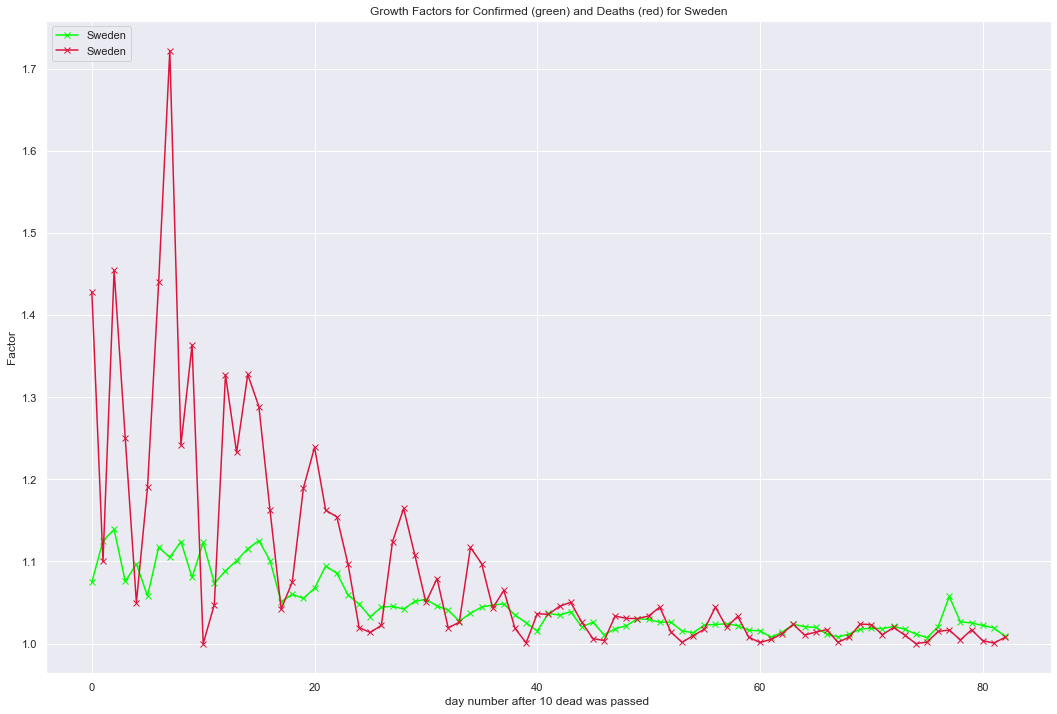

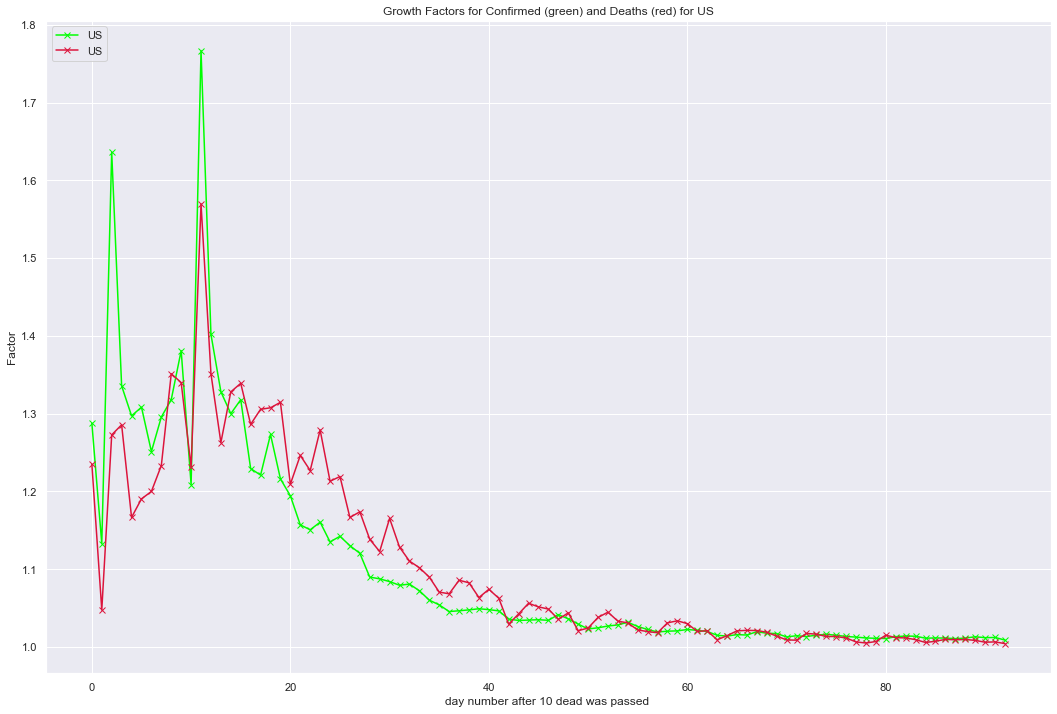

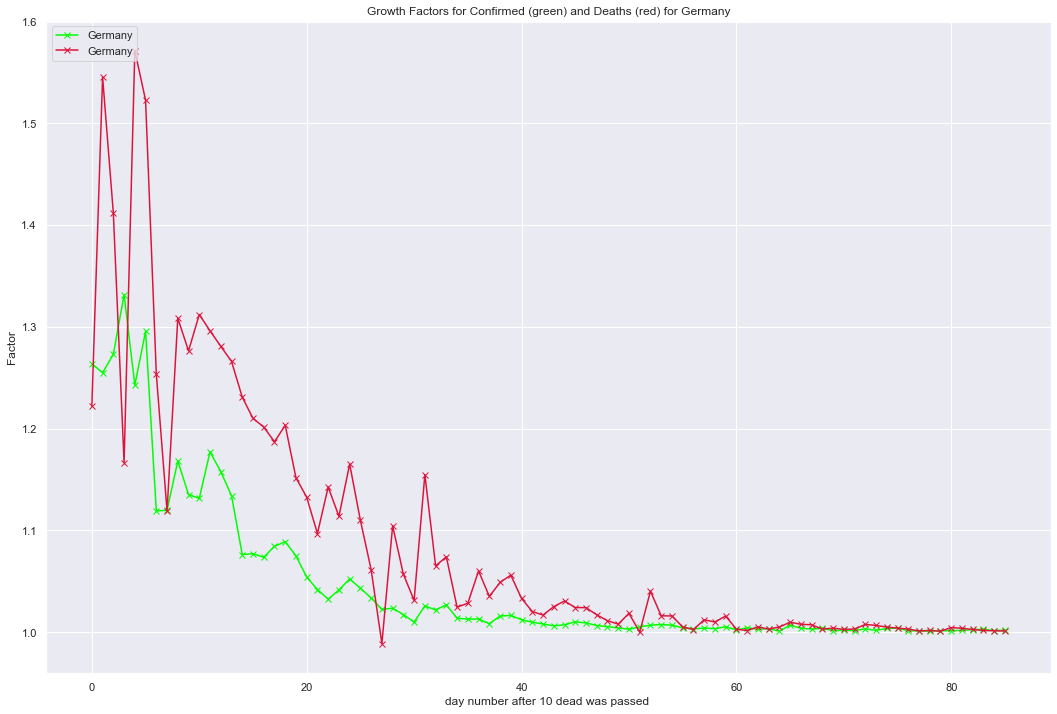

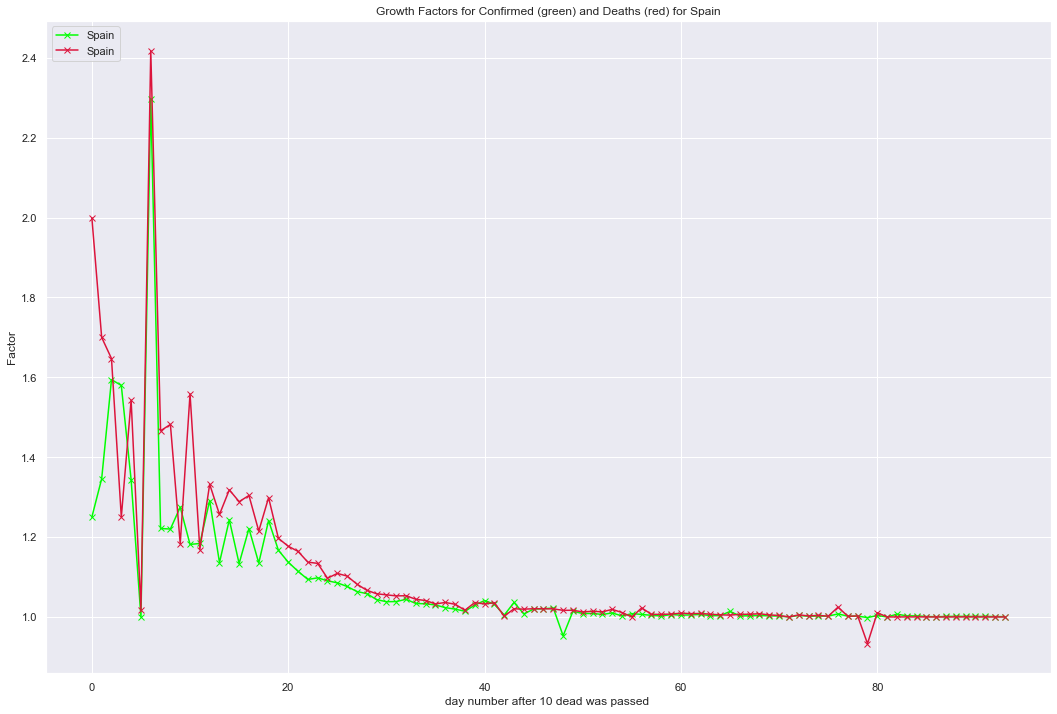

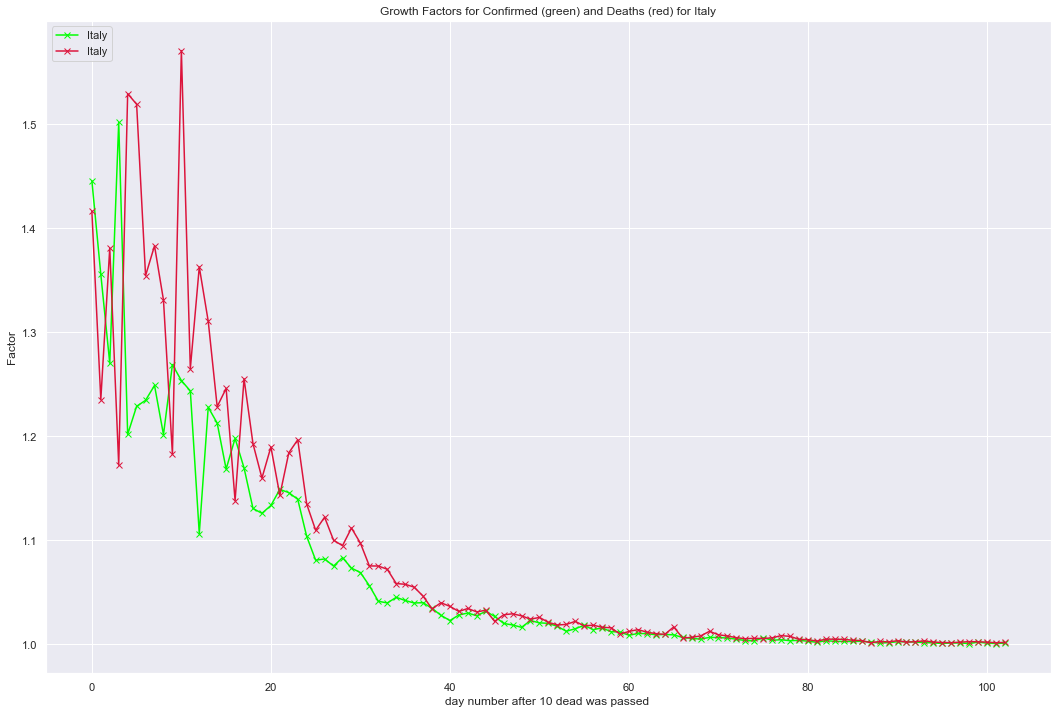

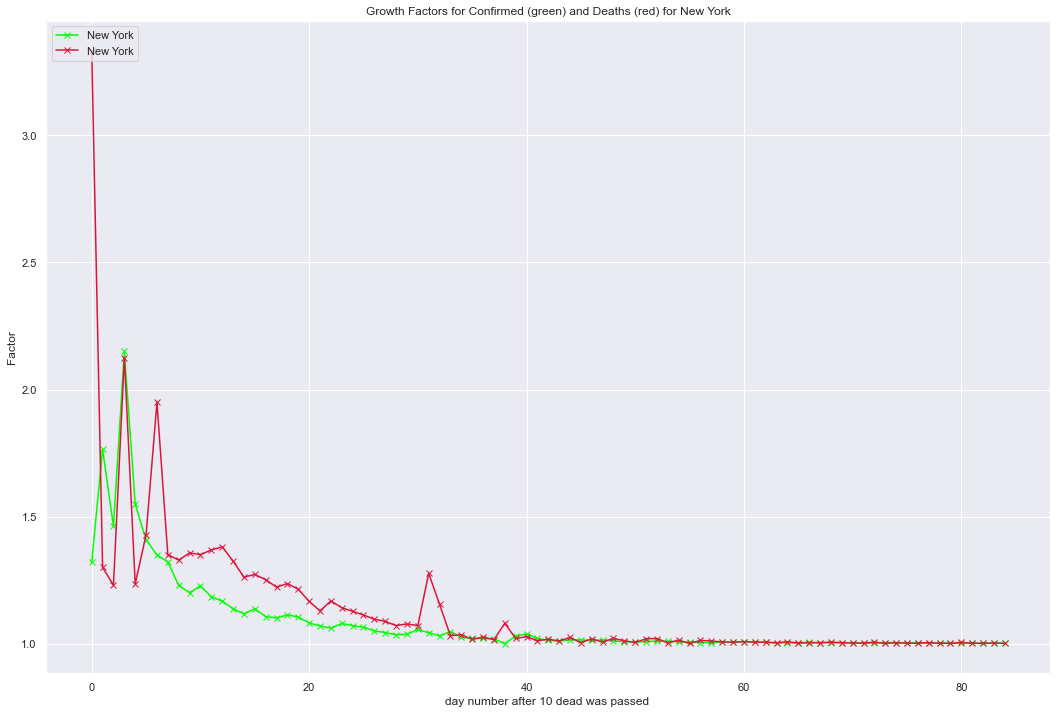

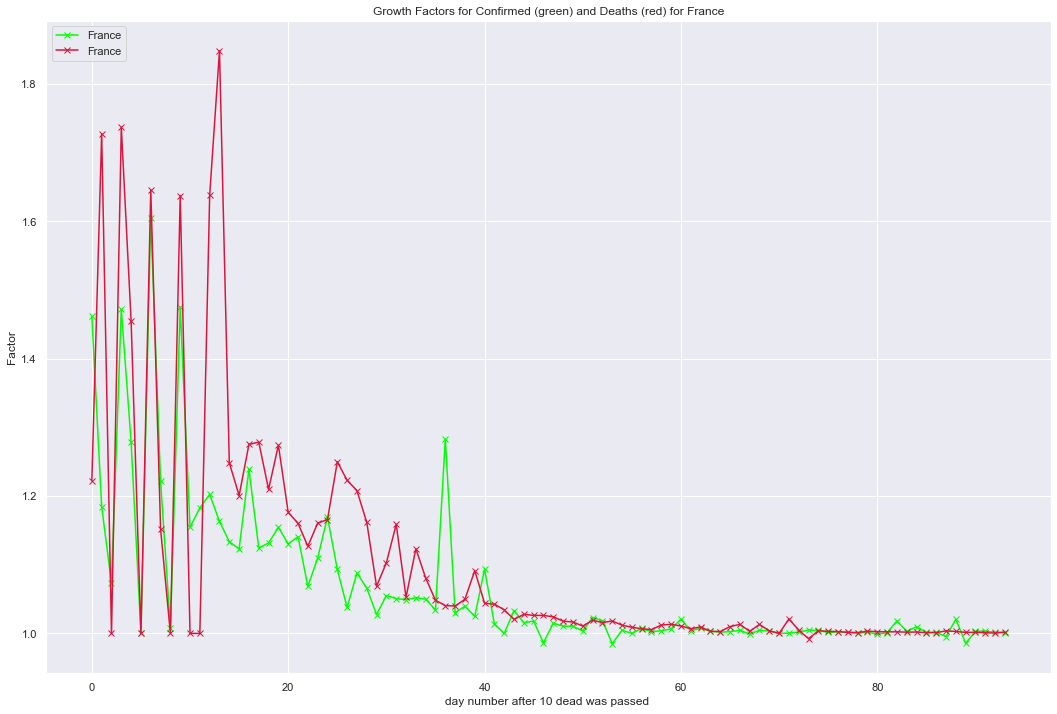

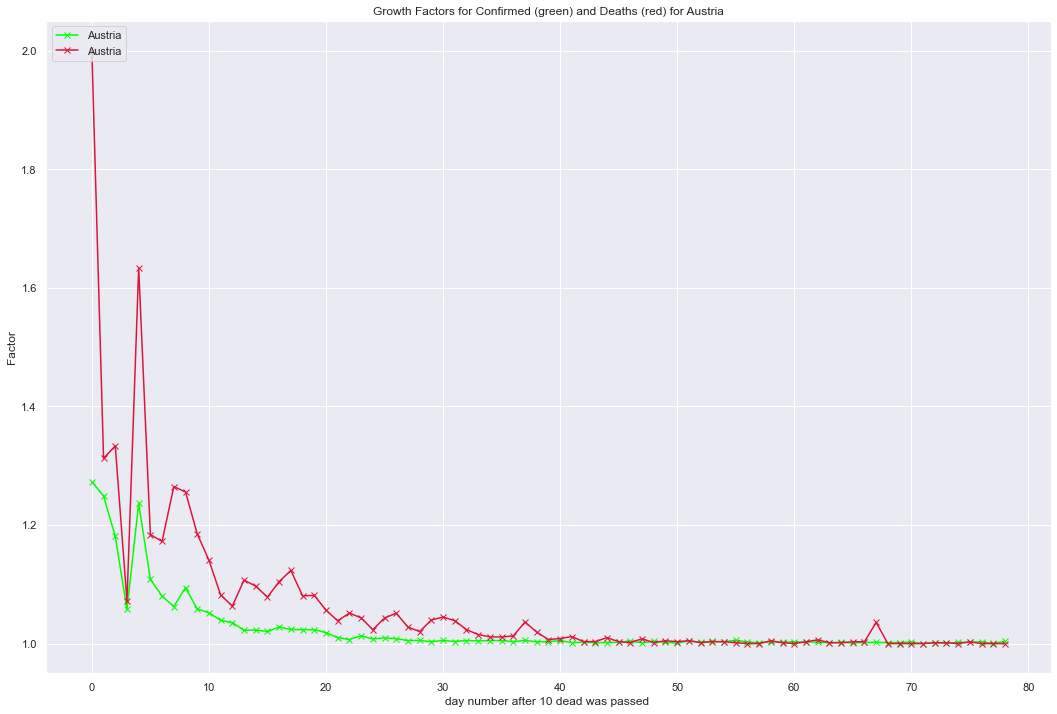

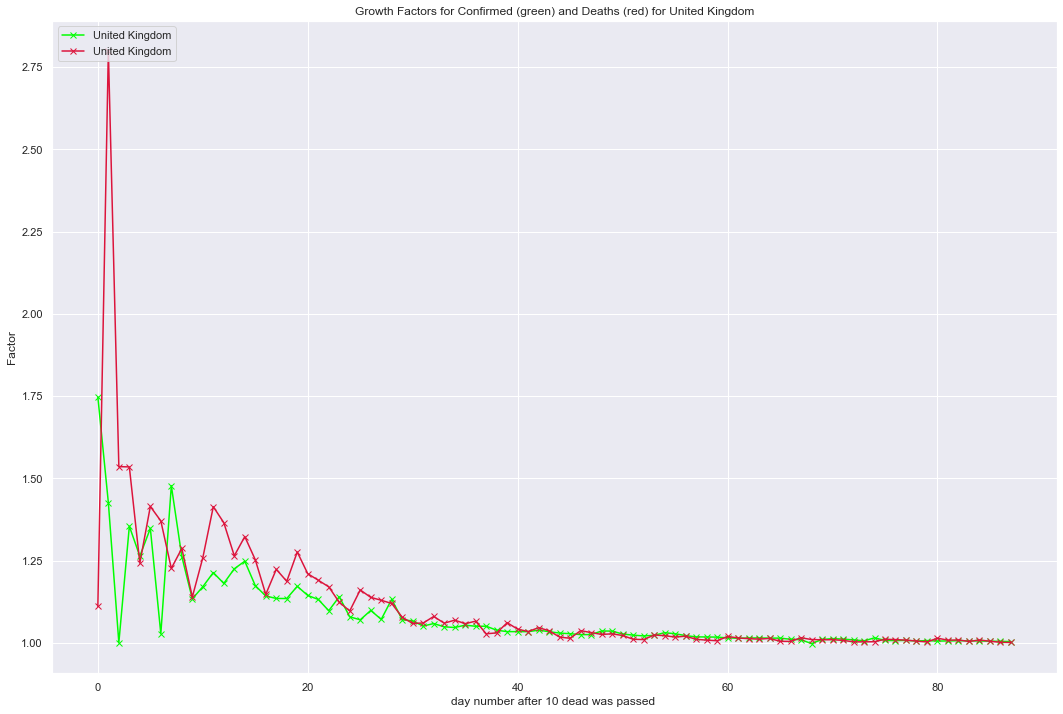

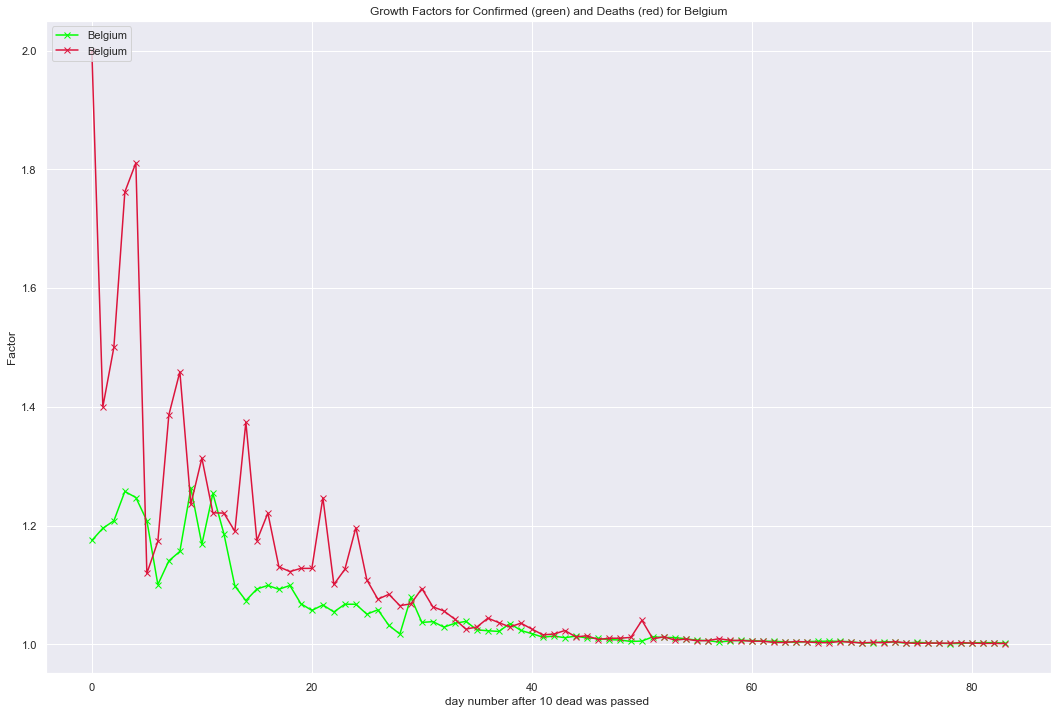

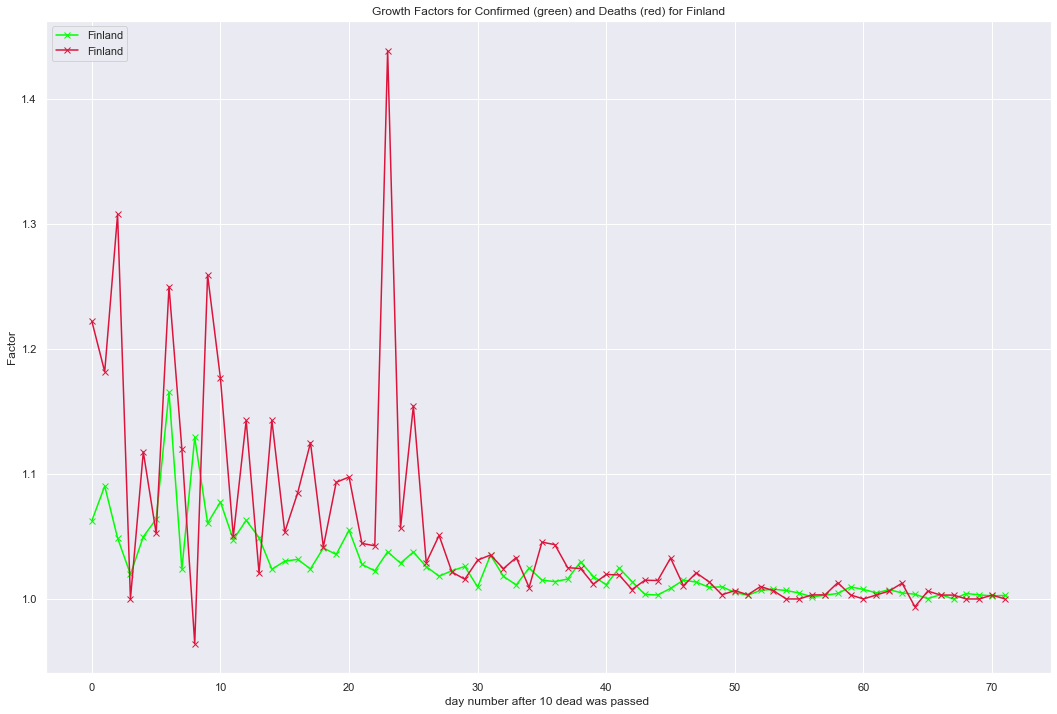

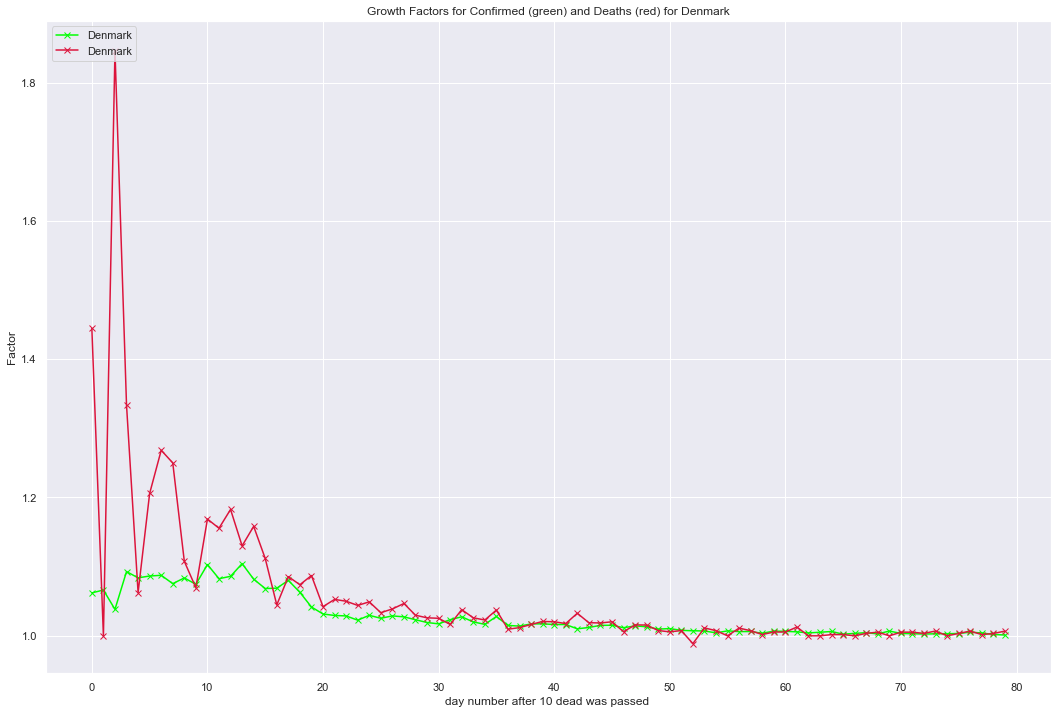

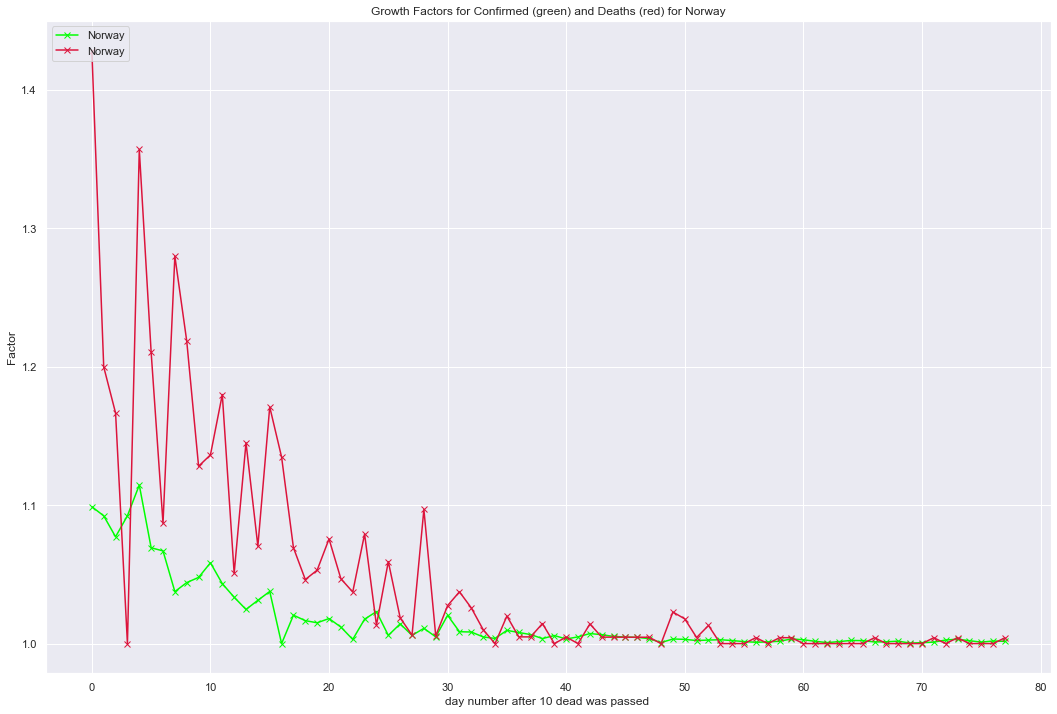

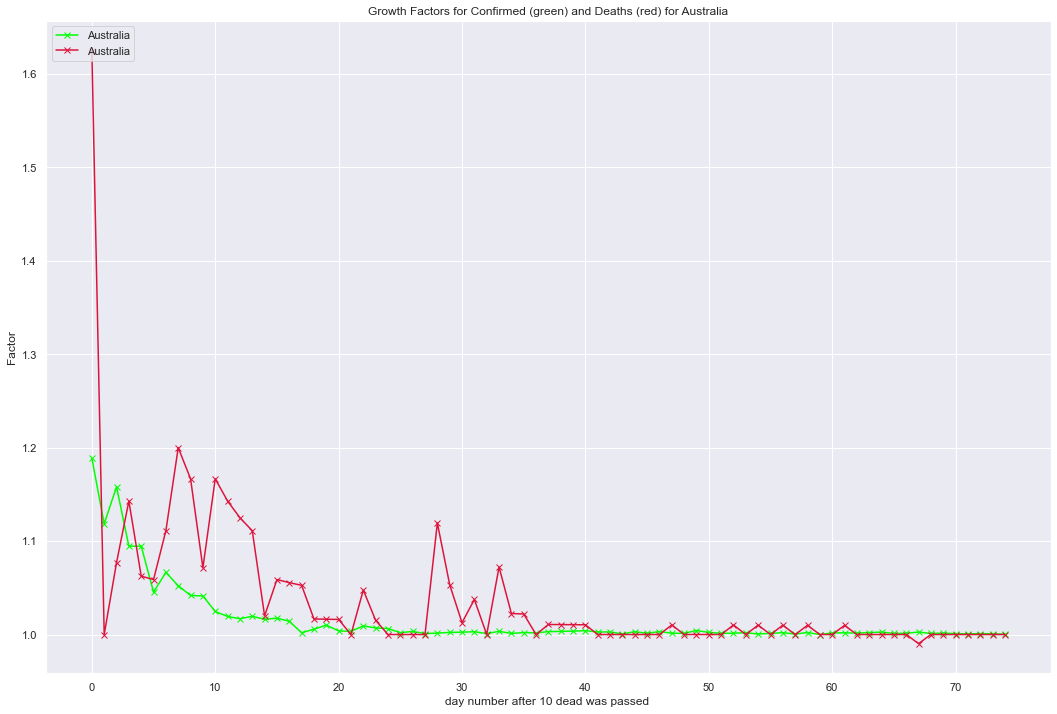

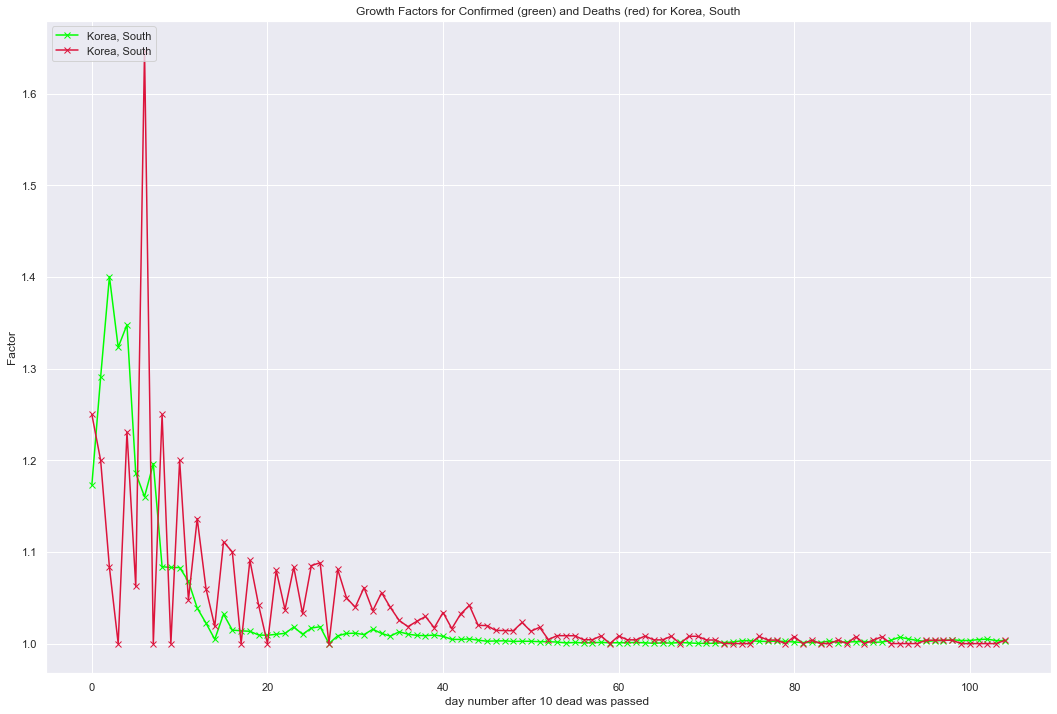

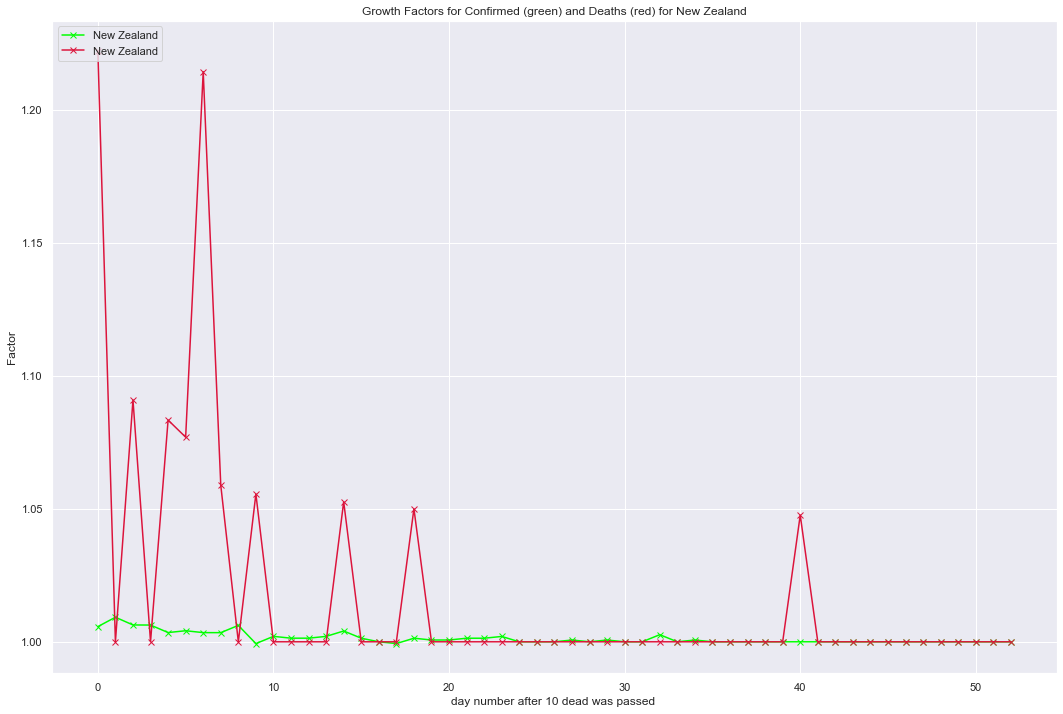

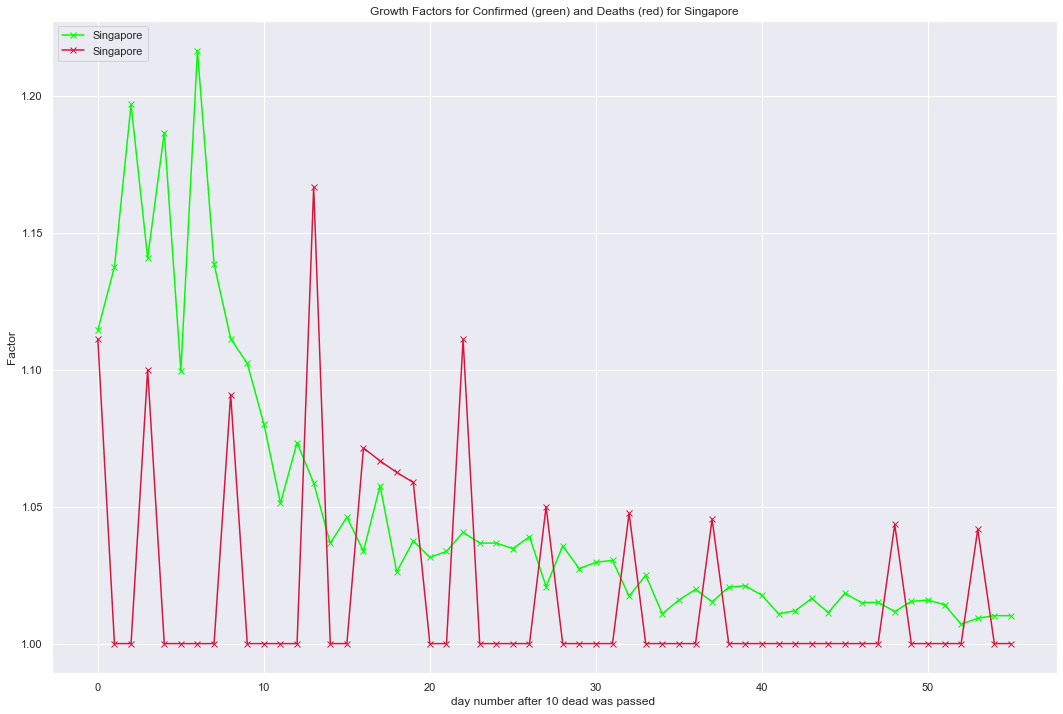

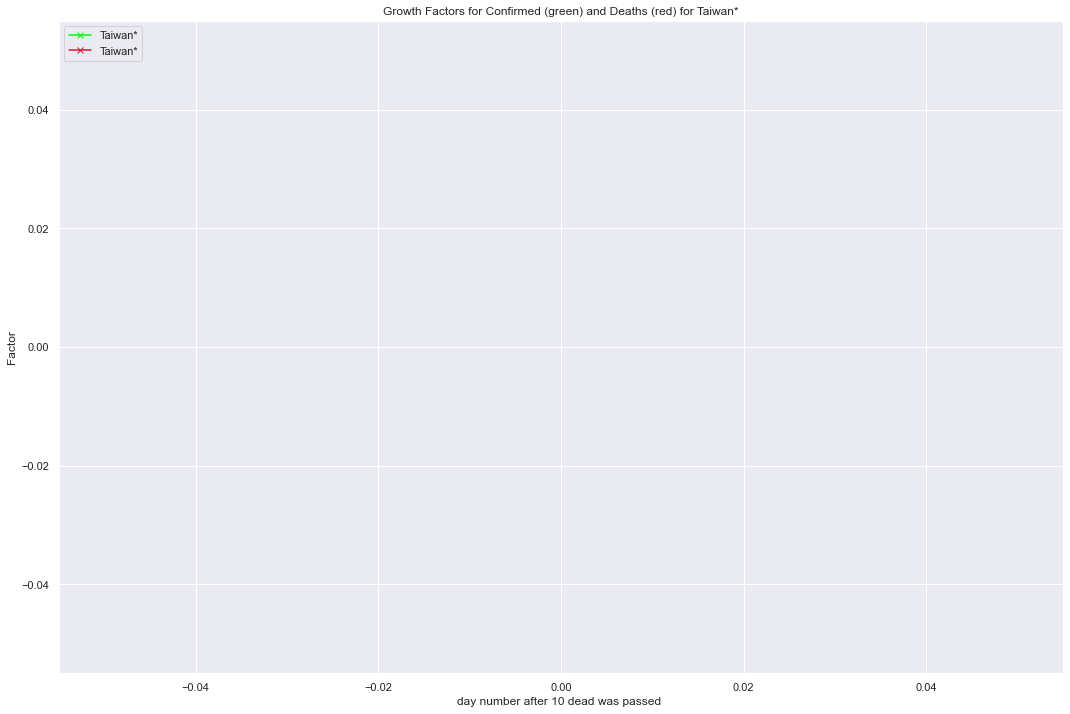

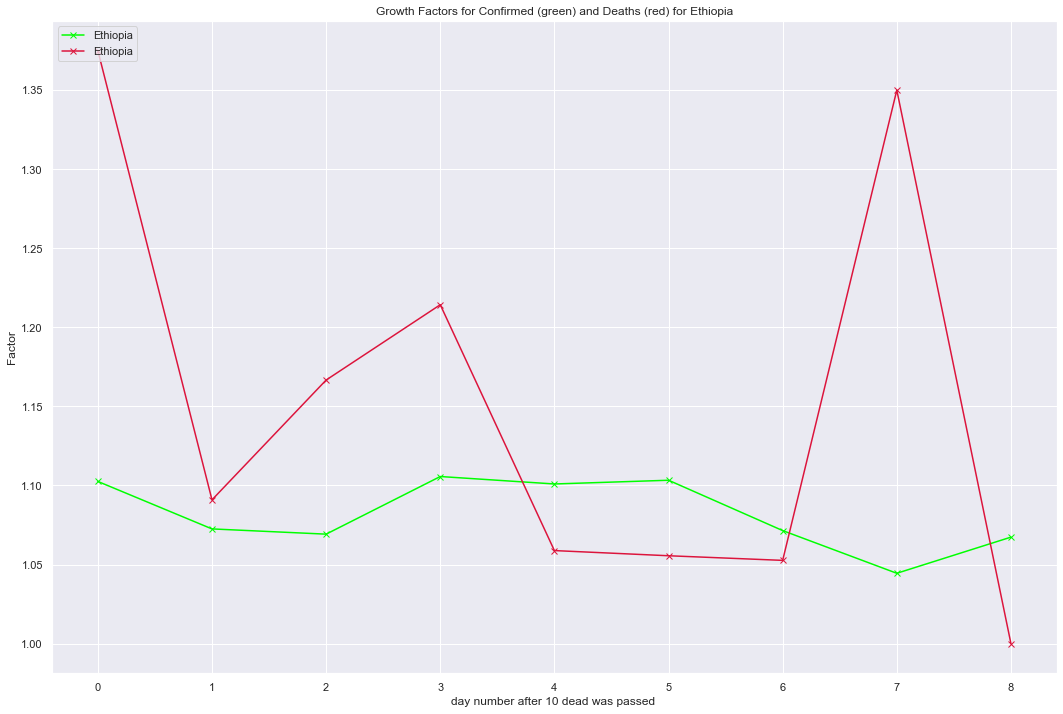

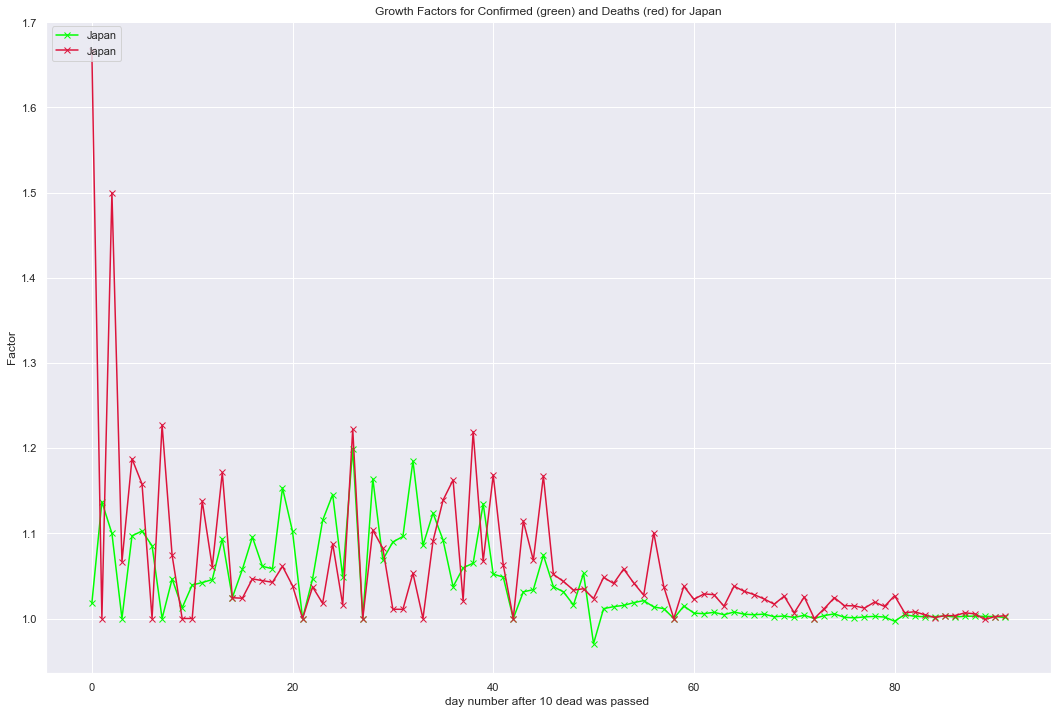

In [95]:
for i,c in enumerate(countries):
    plt.figure(figsize=(18,12))
    plt.title('Growth Factors for Confirmed (green) and Deaths (red) for {}'.format(c))
    
    process_country(c,'factor_per_M',1)
    process_country(c,'factor_dead_per_M',6)
    plt.yscale('linear')
    plt.savefig('Growth_factors_for_{}.jpg'.format(c),format='jpg')

In [96]:
x_param = 'factor_dead_per_M'
y_param = 'factor_per_M'

def regression(x,y,country):
    
    def standardize(x):
        return (x - x.mean()) / x.std()
    
    x_org = x
    y_org = y
    
    x = standardize(x)
    y = standardize(y)
    
    plt.figure(figsize=(18,12))
    plt.ylabel(y_param + r' [ STD units $\mu$: {:.2f} $\sigma$: {:.2f} ]'.format(y_org.mean(),y_org.std()))
    plt.xlabel(x_param + r'[ STD units $\mu$: {:.2f} $\sigma$: {:.2f} ]'.format(x_org.mean(),x_org.std()))
    plt.scatter(x,y,color='r')
    
    slope,intercept,_,_,_ = sps.linregress(x,y)
    
    X = np.linspace(min(x),max(x),1000)
    
    plt.plot(X,[X[i] * slope + intercept for i in range(len(X))], color='k',ls='dashed',
            label='LSQ, slope {:.2f} intercept {:.2f}'.format(slope,intercept))
    
    
    beta_mu = pm.Uniform('beta_mu',0,0.5)
    beta_sigma = pm.Uniform('beta_sigma',0,0.1)
    alpha_mu = pm.Uniform('alpha_mu', 0, 0.5)
    alpha_sigma = pm.Uniform('alpha_sigma',0,0.1)
    
    beta = pm.Normal('beta',beta_mu,beta_sigma / 1 ** 2)
    alpha = pm.Normal('alpha',alpha_mu,alpha_sigma / 1 ** 2)
    
    obs_sigma = pm.Uniform('obs_sigma',0,1)
    
    @pm.deterministic()
    def linreq(alpha=alpha,beta=beta,x=x):
        return x * beta + alpha
    
    obs = pm.Normal('linreq',linreq,1 / obs_sigma ** 2,observed=True,value=y)
    
    model = pm.Model([beta_mu,beta_sigma,alpha_mu,alpha_sigma,beta,alpha,linreq,obs,obs_sigma])
    
    try:
        map_ = pm.MAP(model)
        map_.fit()
    except:
        print ('cant fit {}'.format(country))
    
    mcmc = pm.MCMC(model)
    mcmc.sample(100000,50000,2)
    
    beta_post = mcmc.trace('beta')[:]
    alpha_post = mcmc.trace('alpha')[:]
    
    result = pd.DataFrame({'beta_post': beta_post,
                          'alpha_post' : alpha_post})
    
    print()
    print (result.describe())
    
    CI_89 = np.percentile(result.beta_post,[5.5,94.5])
    
    plt.title(r'Regression for {} $\alpha$ {:.2f} $\beta$ {:.2f} $\beta$-CI [ {:.2f} {:.2f} ]  [STD]'.format(
        country,result.alpha_post.mean(),result.beta_post.mean(),CI_89[0],CI_89[1]))

    
    beta_samples = np.random.choice(result.beta_post,replace=True,size=len(X))
    alpha_samples = np.random.choice(result.alpha_post,replace=True,size=len(X))
    
    lines = np.array([X[i] * beta_samples + alpha_samples for i in range(len(X))])
    plt.plot(X,lines,alpha=0.03,color='r')
    
    plt.plot(X,[X[i] * result.beta_post.mean() + result.alpha_post.mean() for i in range(len(X))],
             color='orange',ls='dashed',label='Bayesian mean')
 
    plt.legend(loc='upper left')
    
    plt.savefig('growth_factor_regression_{}.jpg'.format(country),format='jpg')
    
for country in countries:

    df = dick[country]
    
    try:
        df = df.drop(['dead_conf_ratio','conf_over_dead'],axis=1)
    except:
        print ('Skipping delete col for {}'.format(country))
        
    population = country_populations.loc[country,'population']
    df['conf_per_M'] = df['confirmed'] / (population / 1e6)
    df['dead_per_M'] = df['deceased'] / (population / 1e6)
    df['factor_per_M'] = df['conf_per_M'] / df['conf_per_M'].shift()
    df['factor_dead_per_M'] = df['dead_per_M'] / df['dead_per_M'].shift()
    
    mask = ( ( df['confirmed'] >= confirmed_min ) & ( df['deceased'] >= dead_min))
    df = df[mask]
    df = df.replace(np.inf,np.nan)
    df.dropna(inplace=True)
    df.reset_index(inplace=True)

    #regression(df[x_param],df[y_param],country)


Skipping delete col for New York


In [97]:
shifted_df = df.copy()
shifted_df[x_param] = shifted_df[x_param].shift(7)
shifted_df.dropna(inplace=True)

x_param = 'dead_inc'
y_param = 'inc'
#regression(shifted_df[x_param],shifted_df[y_param],'Italy')



In [98]:
def plot_trend(country_name):
    
    country = dick[country_name]
    
    plt.figure(figsize=(18,12))
    plt.title('{} growth of confirmed and deceased'.format(country_name.upper()))
    ax = plt.gca()
    ax2 = plt.twinx()
    country['inc'].cumsum().plot(ax=ax,color='orange',label='cumulative inc daily confirmed')
    country['dead_inc'].cumsum().plot(ax=ax2,color='red',label='cumulative inc daily deceased')
    ax.set_ylabel('Confirmed')
    ax2.set_ylabel('Deceased')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    #ax.set_yscale('log')
    #ax2.set_yscale('log')
    plt.savefig('{}_growth_confirmed_deceased.jpg'.format(country_name.upper()),format='jpg')

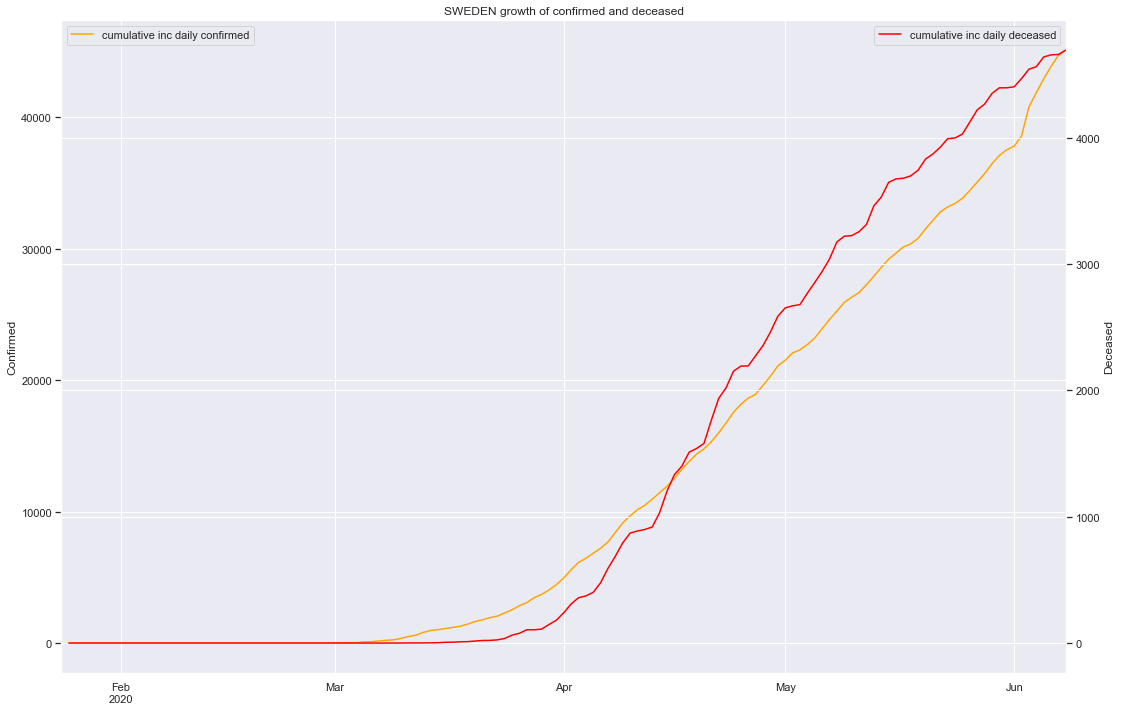

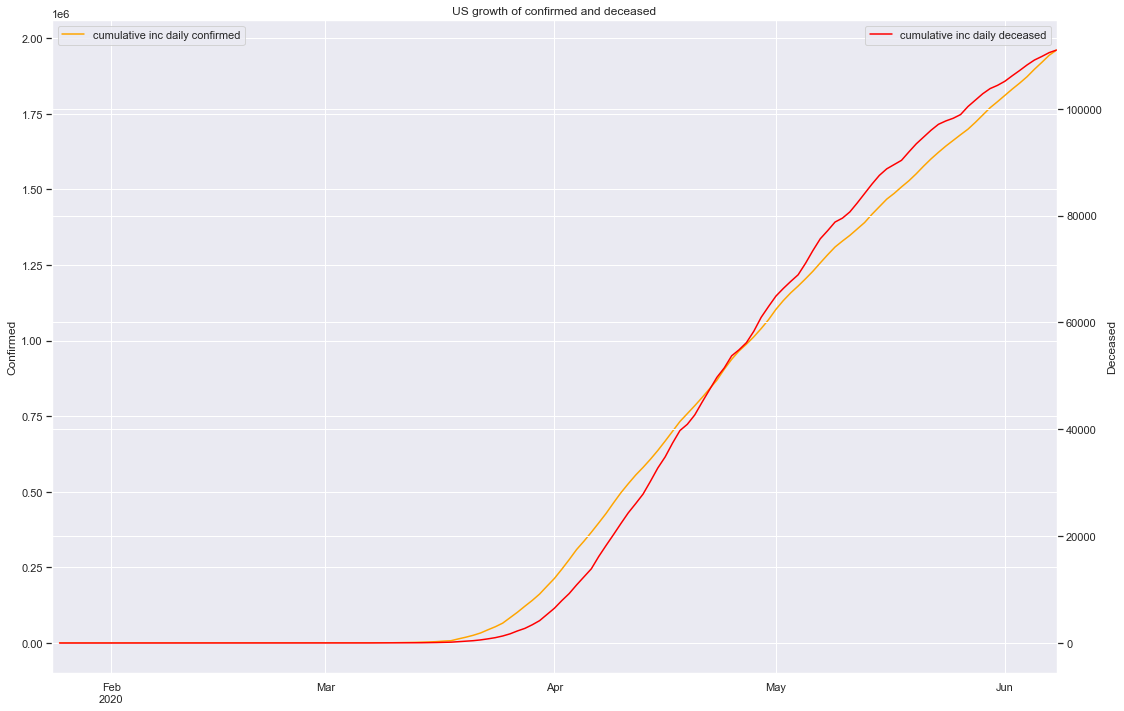

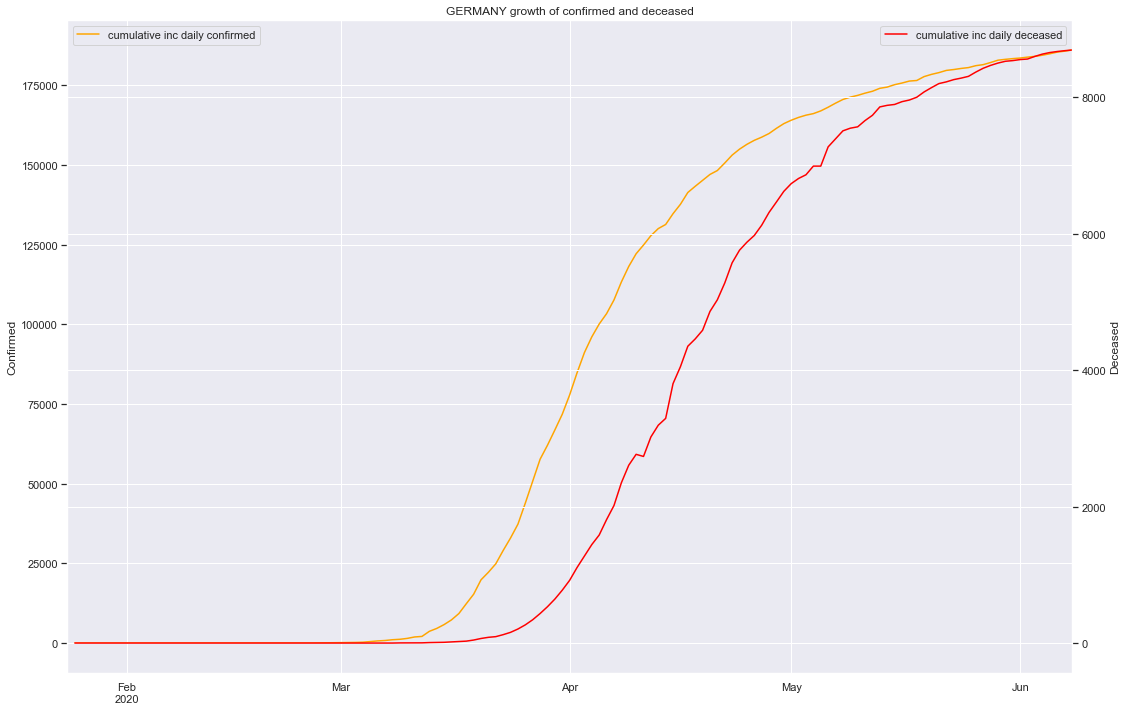

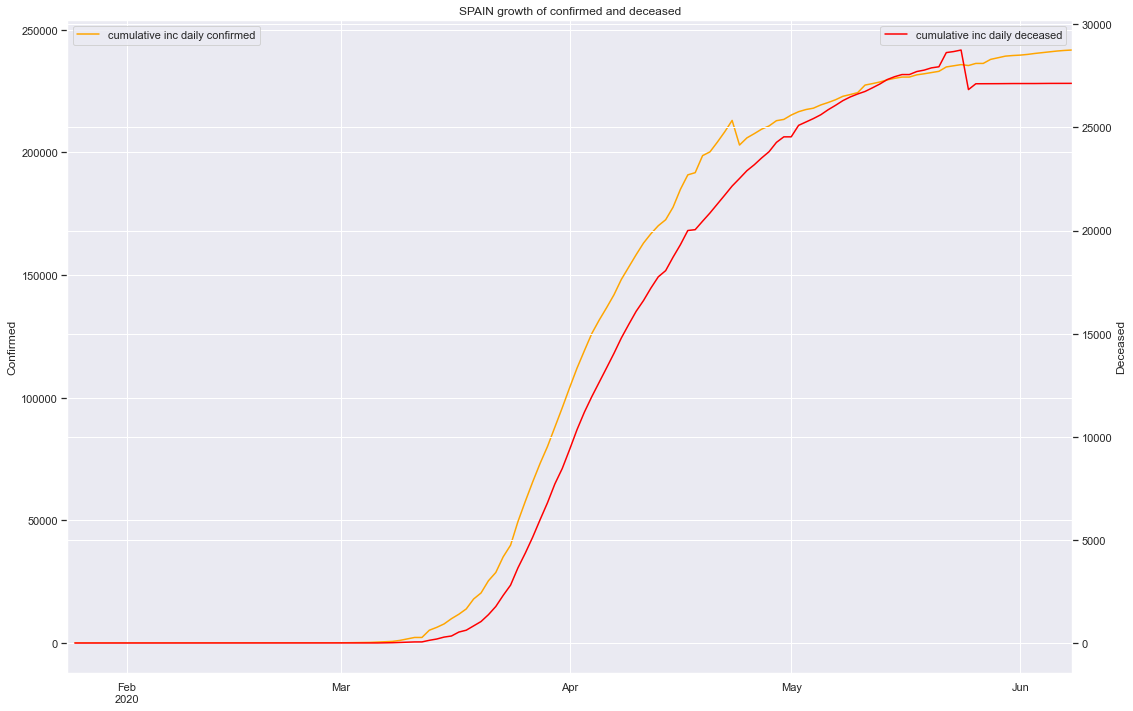

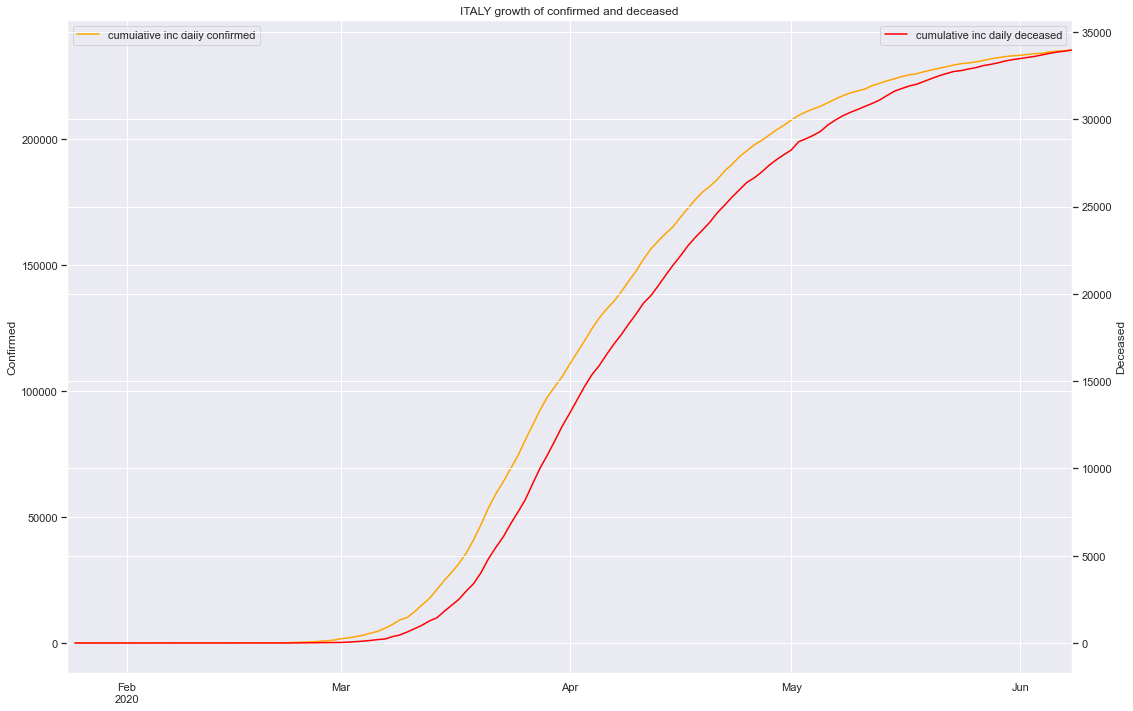

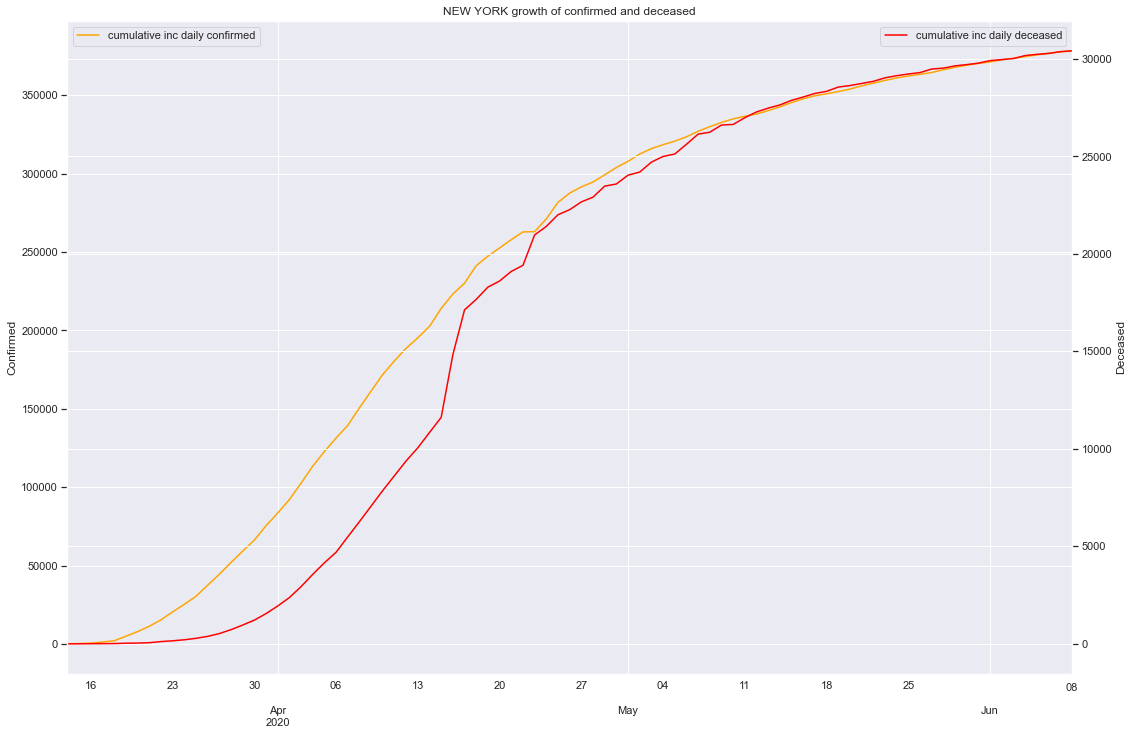

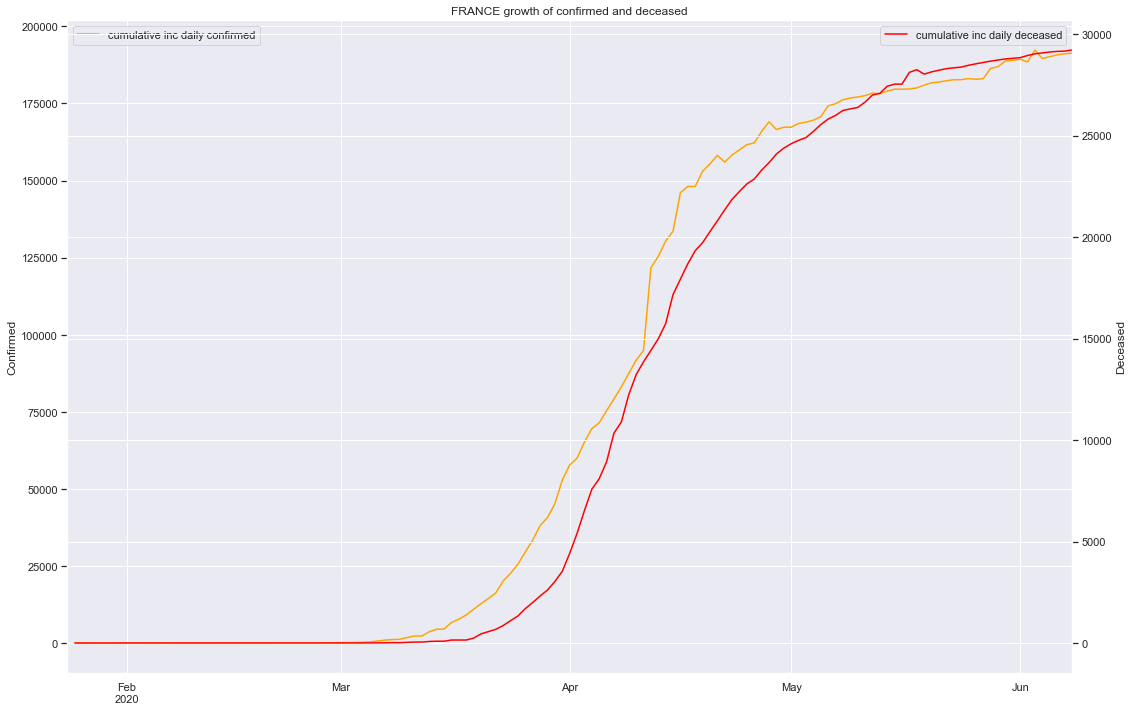

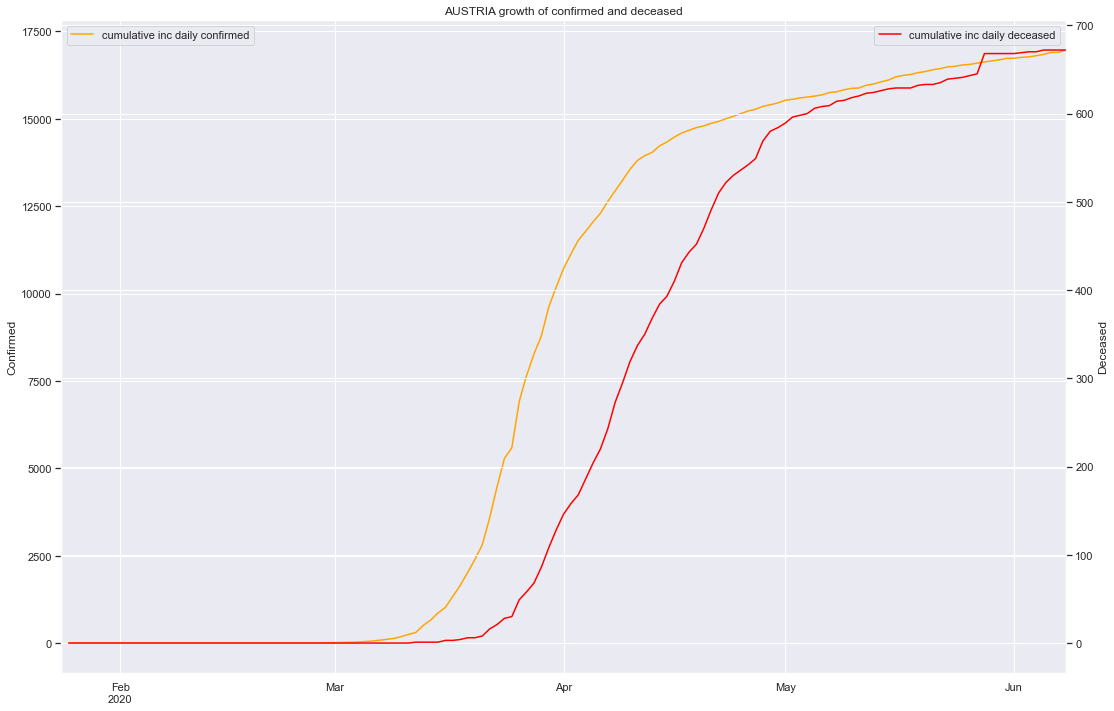

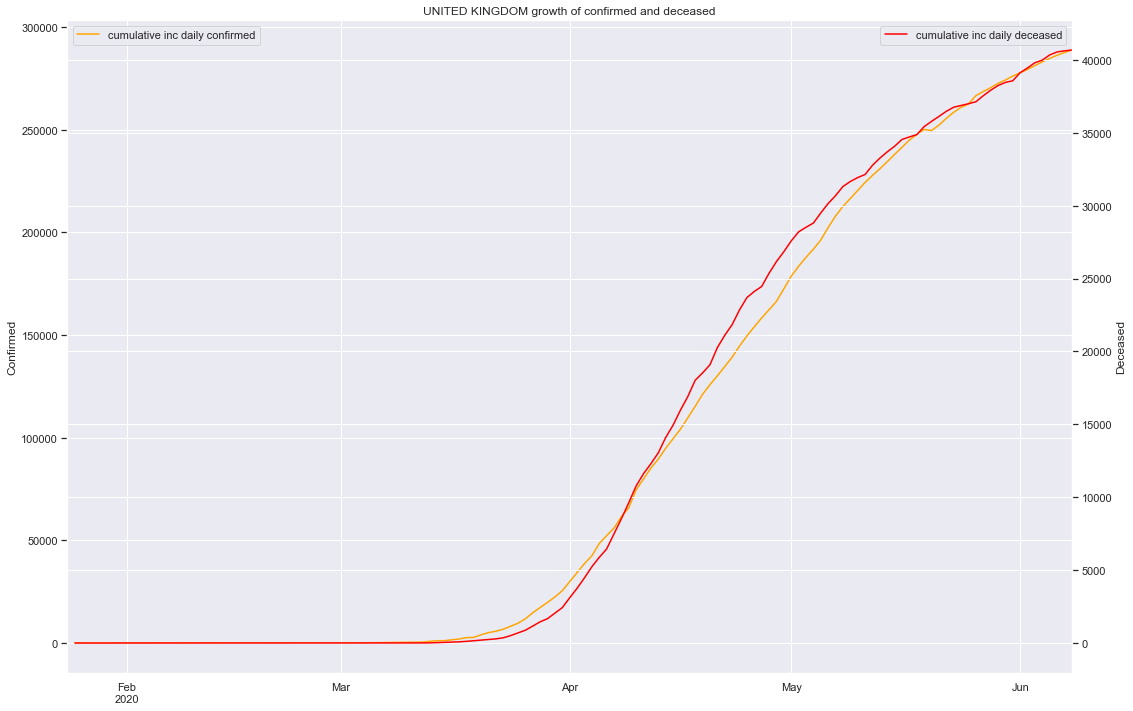

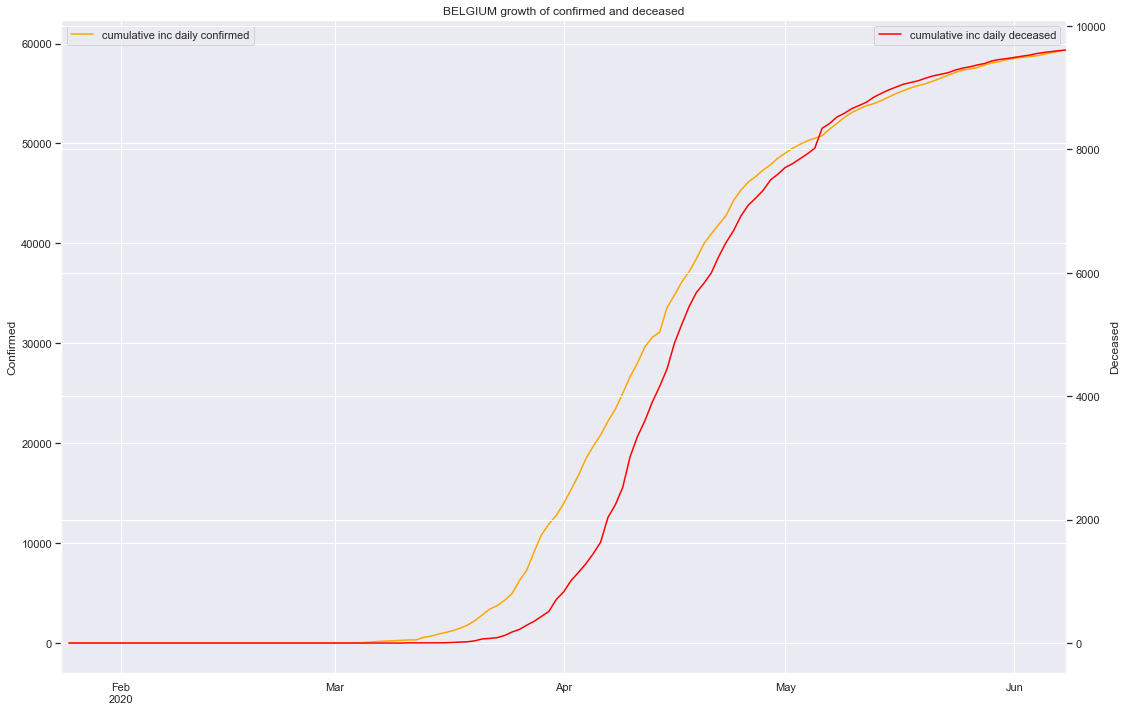

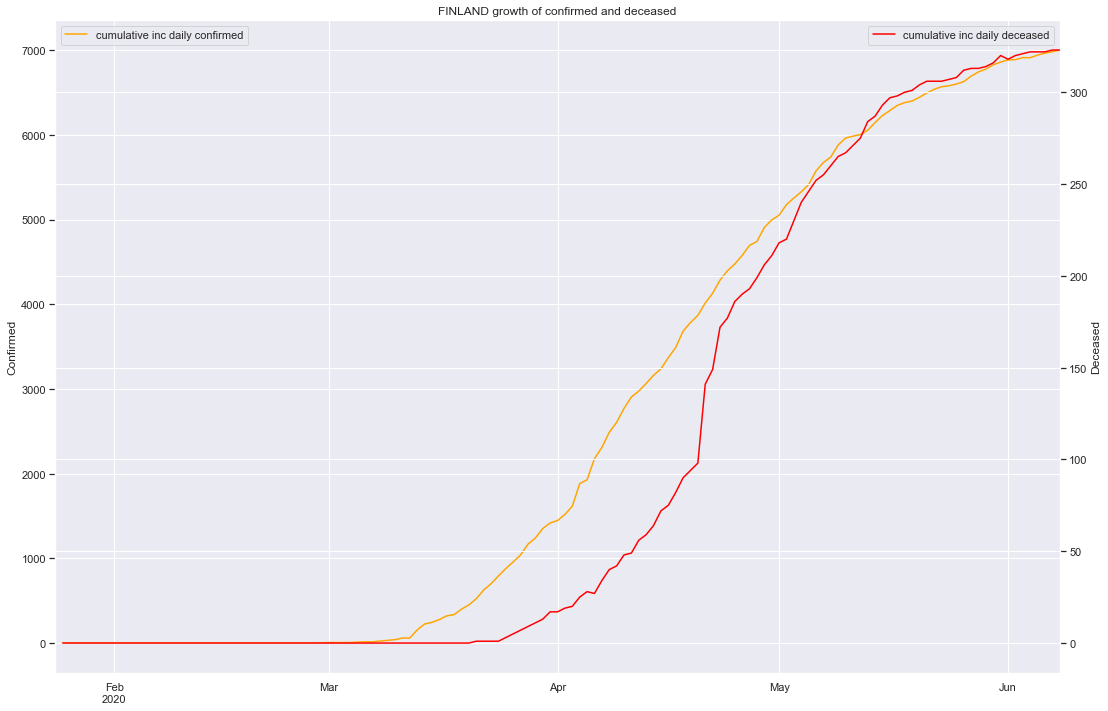

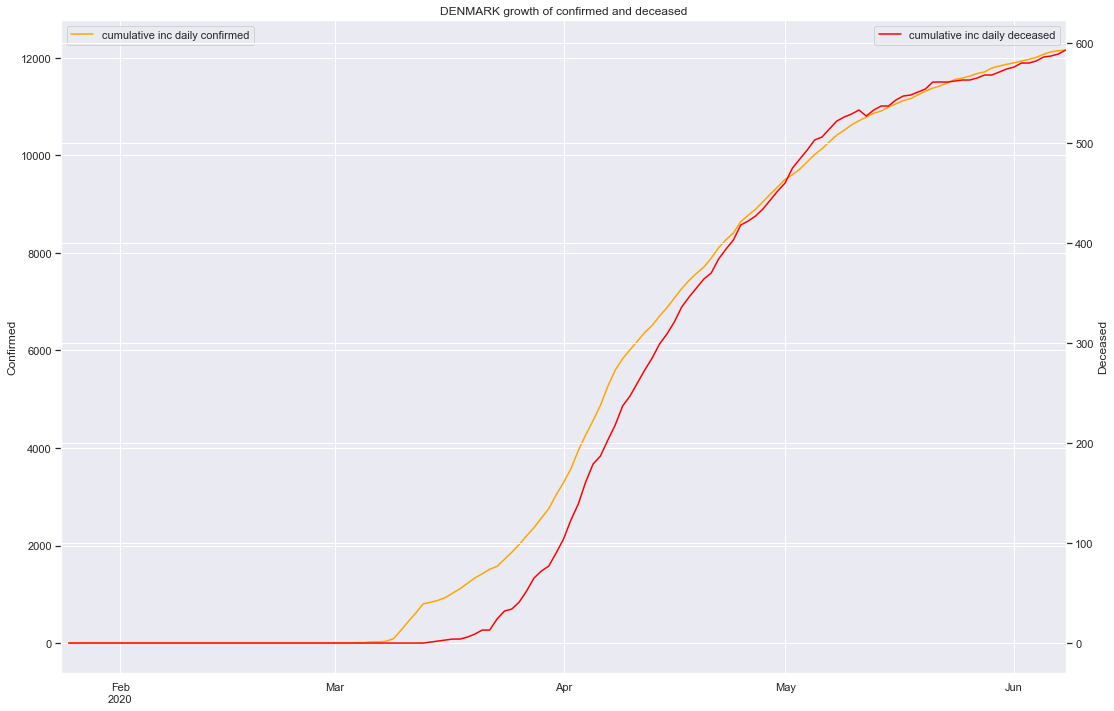

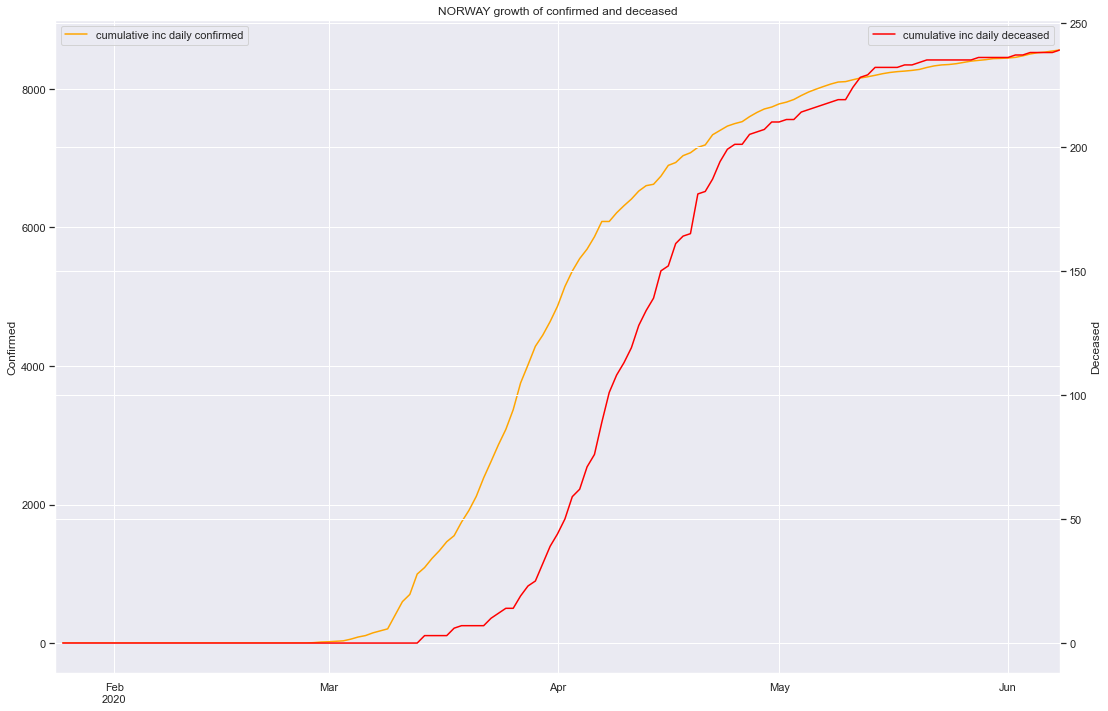

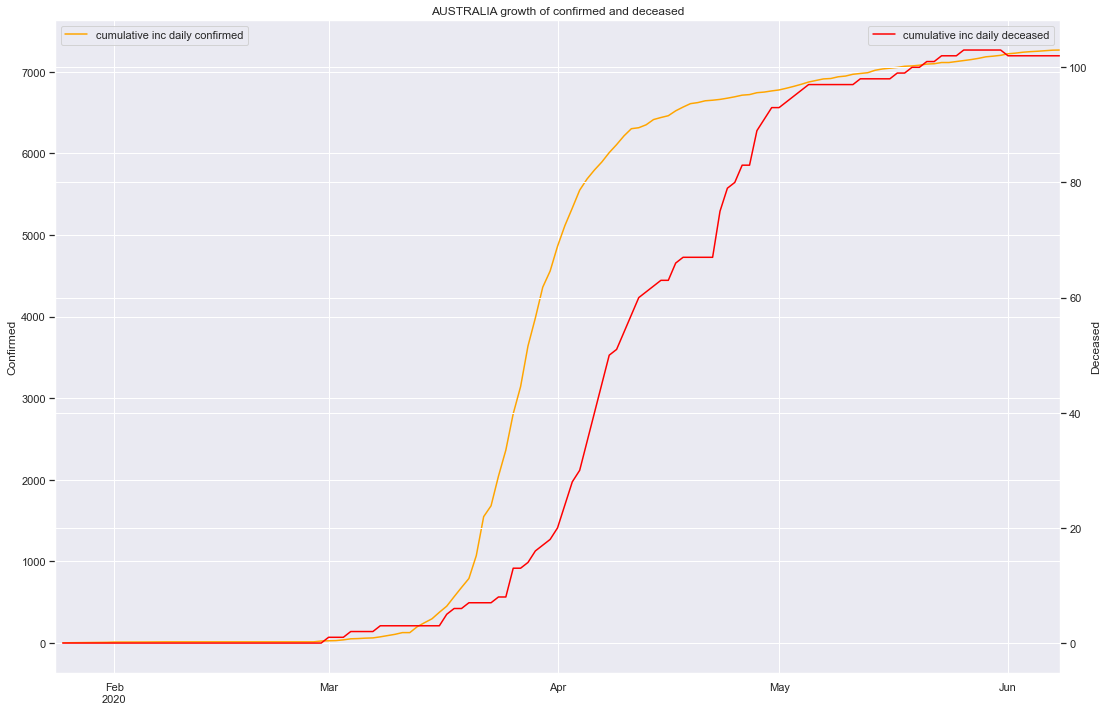

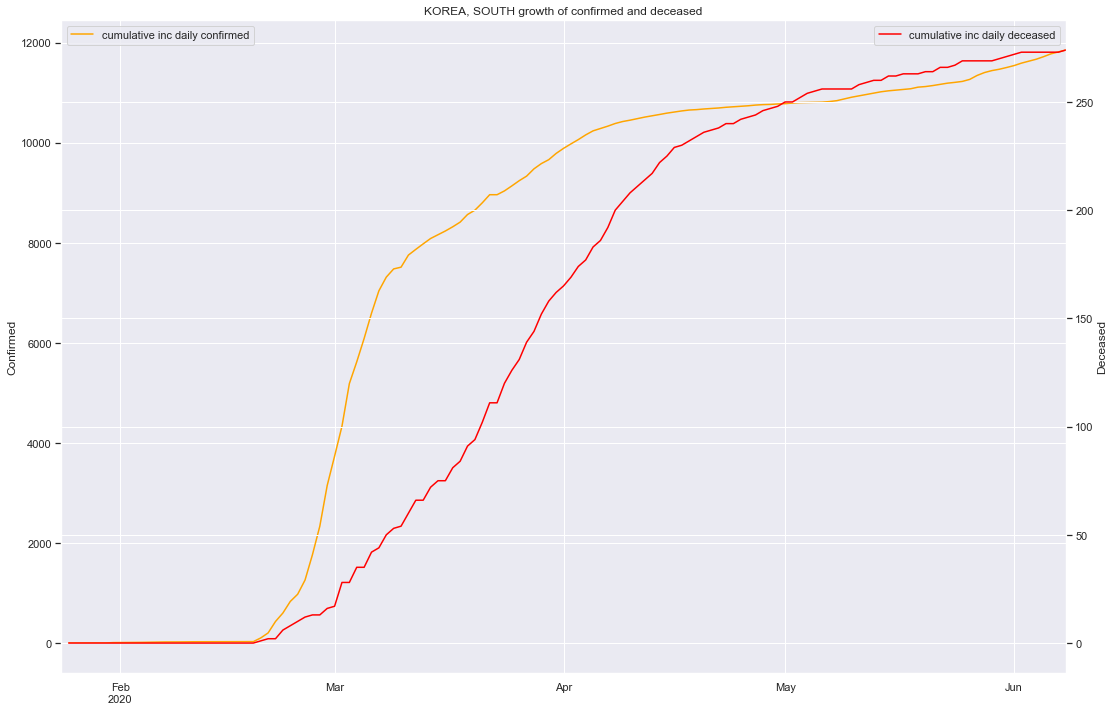

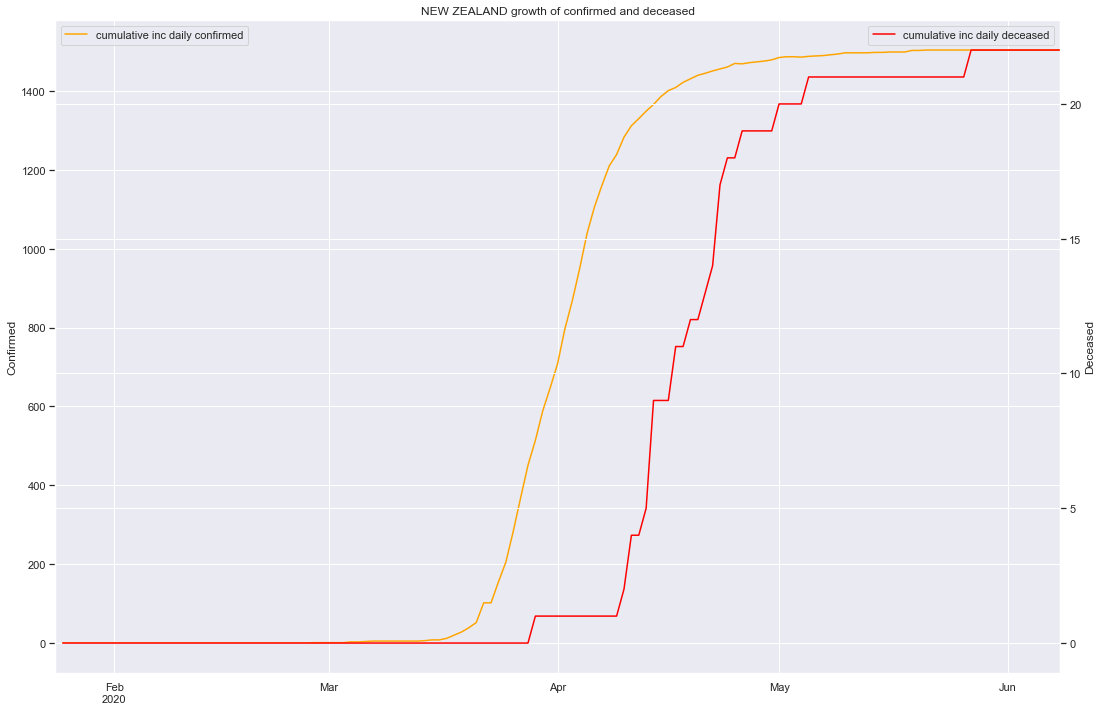

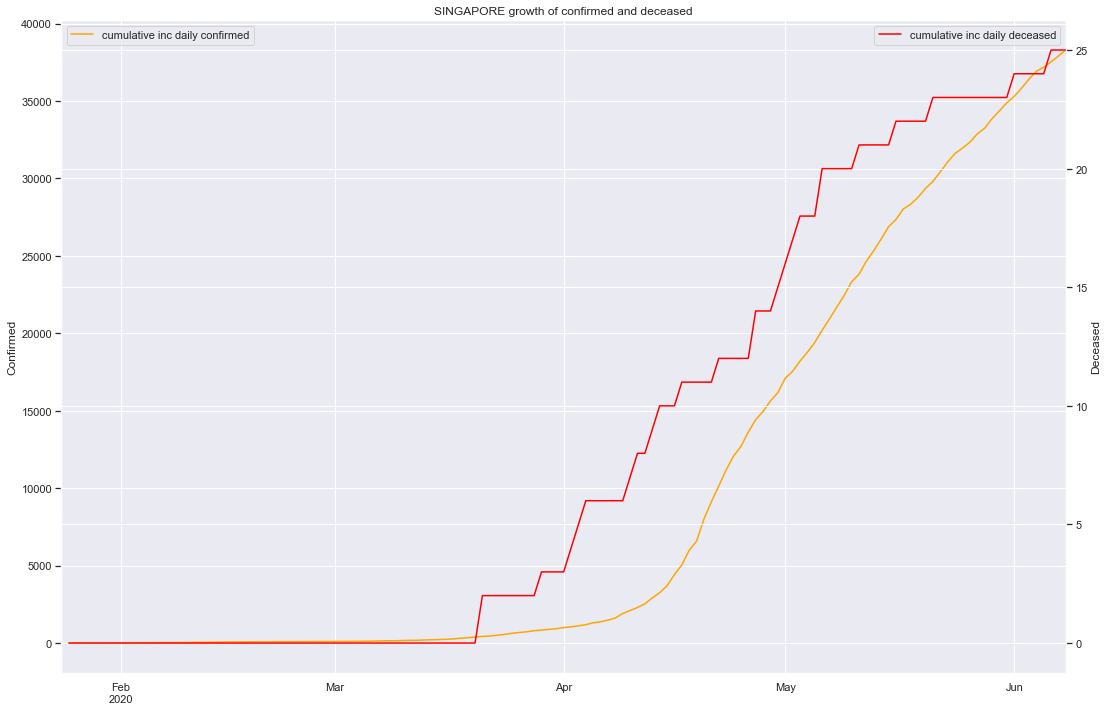

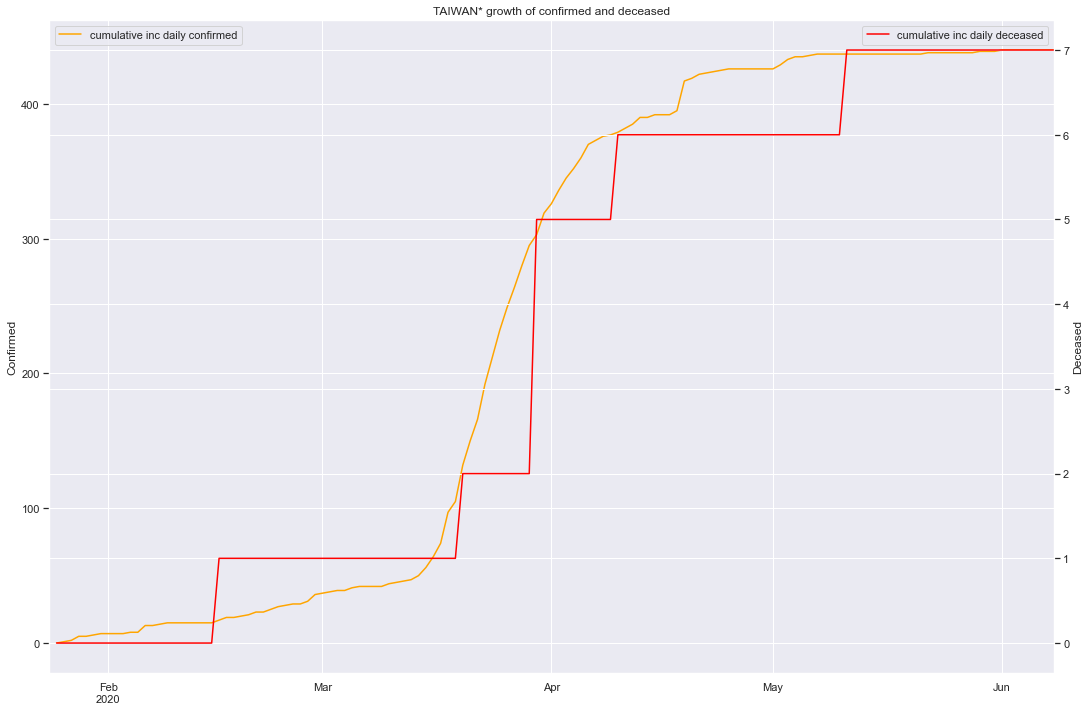

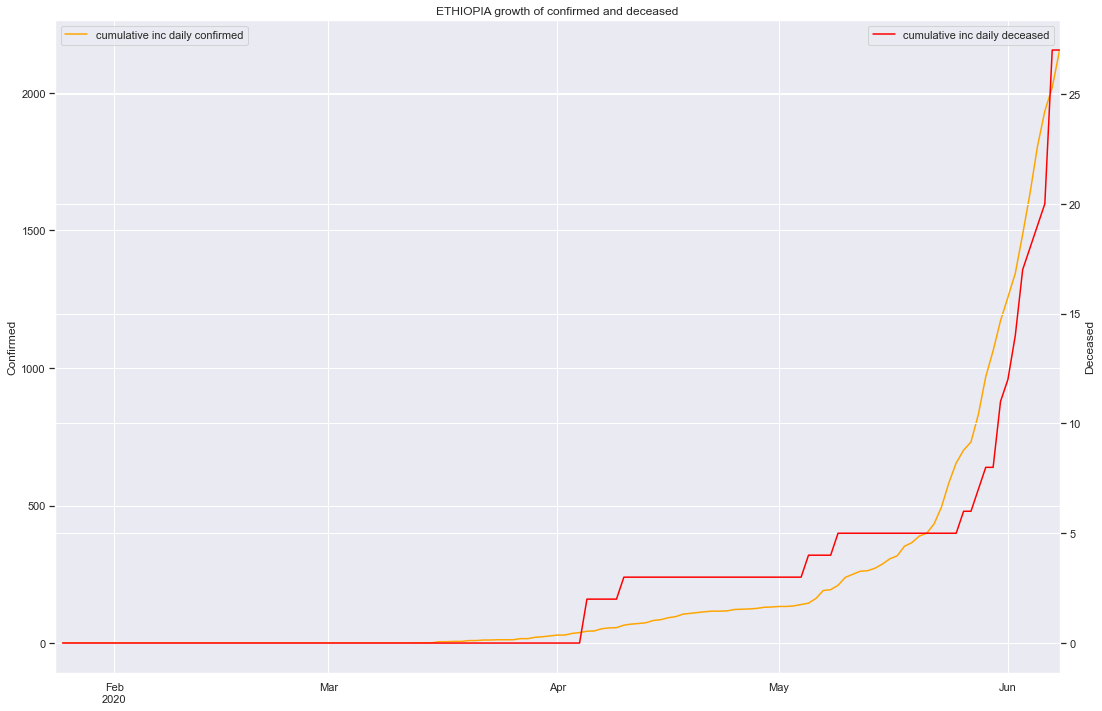

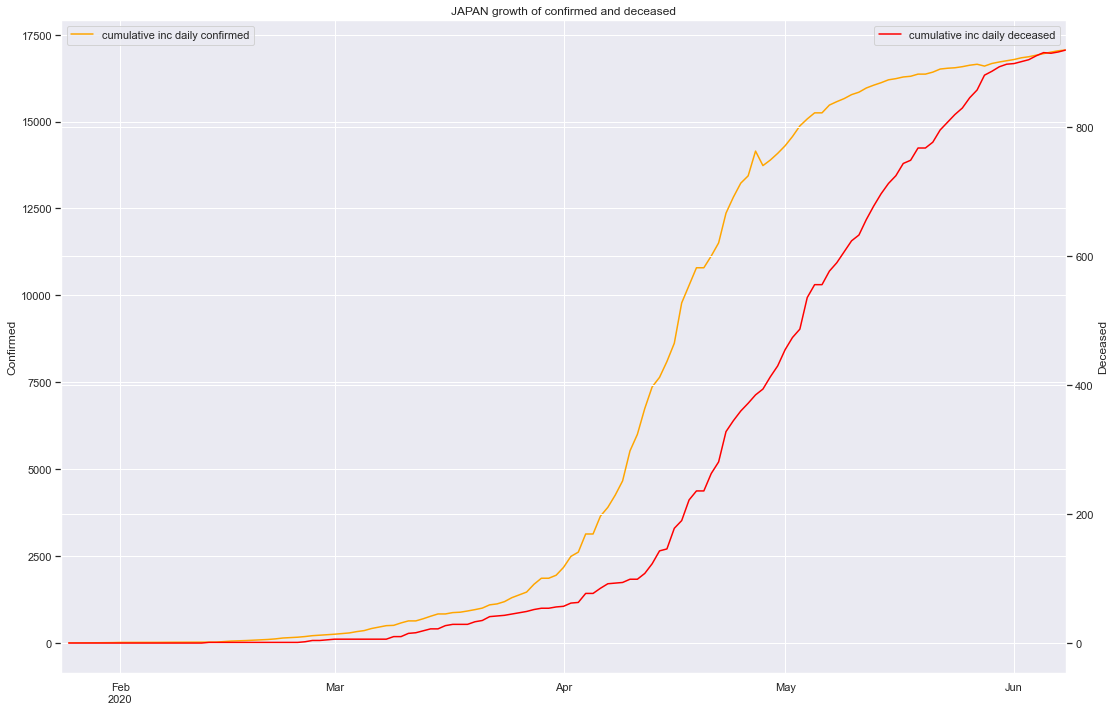

In [99]:
for c in countries:
    plot_trend(c)

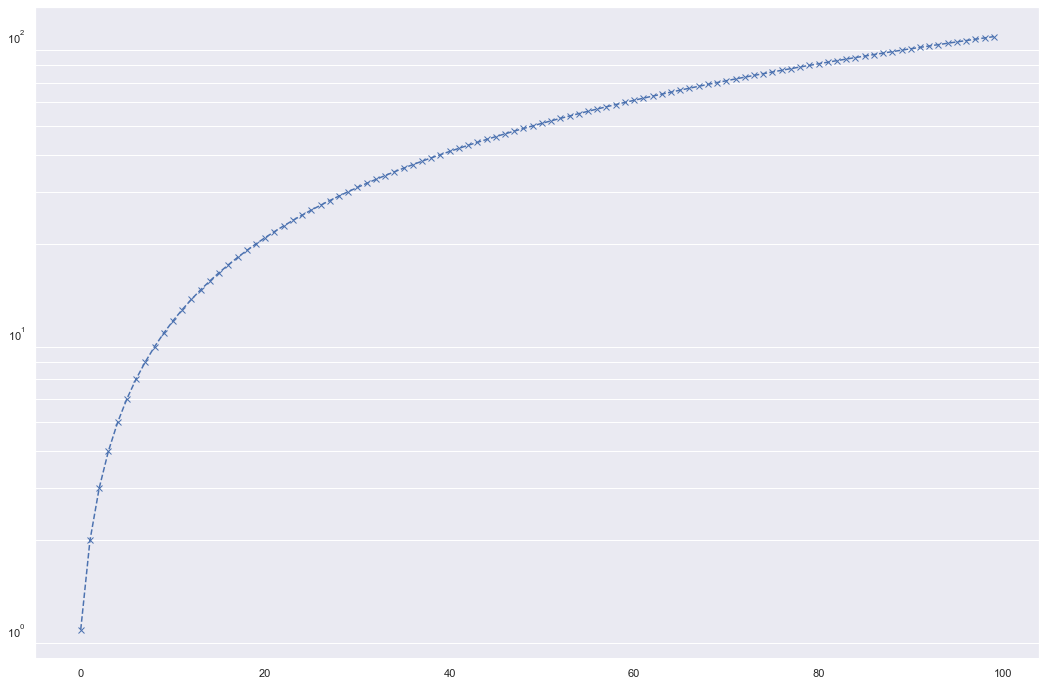

In [100]:
#example of log scale
x = np.arange(1,101)

plt.figure(figsize=(18,12))
plt.plot(x,'x--')
plt.yscale('log')
plt.grid(which='both')